In [1]:
import pydicom as dicom
import matplotlib.pylab as plt
import numpy as np
import os

import cv2
from natsort import natsorted
from sklearn.mixture import GaussianMixture
from skimage.registration import phase_cross_correlation
from scipy import ndimage as scp
from tqdm import tqdm
from statsmodels.tsa.stattools import acf
import pickle
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.fftpack import fft2, fftshift, ifft2, fft, ifft
import time
from skimage.registration import optical_flow_tvl1, optical_flow_ilk

from skimage.exposure import equalize_hist
from skimage.exposure import equalize_adapthist

# from my_funcs import *

# Registration

In [2]:
import ants.registration as ants_register
import ants
import scipy.optimize as optz
from itertools import permutations 
from scipy.stats import entropy
from sklearn.metrics import mutual_info_score
from sklearn.metrics.pairwise import manhattan_distances
from skimage.filters import threshold_otsu
from skimage.metrics import normalized_mutual_information as nmi

# testing

In [ ]:
with open('/Users/akapatil/Documents/OCT/before_drop_pigeyeball_data.pickle', 'rb') as handle:
    reg_pics = pickle.load(handle)

In [ ]:
reg_pics_cropped = reg_pics[:,300:450,400:600]
del reg_pics

In [ ]:
def funcc_shift(shift,stat_i):
    shift_new = scp.shift(reg_pics_cropped[stat_i[0]],(shift[0],shift[1]),order=0,mode='constant')
    return -nmi(shift_new,reg_pics_cropped[stat_i[1]])
    # return np.sum((shift_new-reg_pics_cropped[stat_i[1]])**2)

for i in tqdm(range(0,reg_pics_cropped.shape[0]-100,100)):
    for k in range(i,i+100):
        opt_rot = optz.minimize(funcc_shift,x0=[0,0],method='powell',args=([k,i+50]))
        shift_val = np.round(opt_rot['x'])
        reg_pics_cropped[k] = scp.shift(reg_pics_cropped[k],(shift_val[0],shift_val[1]),order=0,mode='constant')


100%|██████████| 24/24 [12:14<00:00, 30.58s/it]


In [ ]:
for i in tqdm(range(100,reg_pics_cropped.shape[0],100)):
    opt_rot = optz.minimize(funcc_shift,x0=[0,0],method='powell',args=([i-1,i]))
    shift_val = np.round(opt_rot['x'])
    for k in range(0,i):
        reg_pics_cropped[k] = scp.shift(reg_pics_cropped[k],(shift_val[0],shift_val[1]),order=0,mode='constant')

100%|██████████| 24/24 [00:14<00:00,  1.61it/s]


In [ ]:
# # new_registered_crop = []
# def funcc_shift(shift,stat_i):
#     shift_new = scp.shift(reg_pics_cropped[stat_i],(shift[0],shift[1]),order=3,mode='constant')
#     return -nmi(shift_new,reg_pics_cropped[1250])
#     # return np.sum((shift_new-reg_pics_cropped[1250])**2)

# for i in tqdm(range(reg_pics_cropped.shape[0])):
#     opt_rot = optz.minimize(funcc_shift,x0=[0,0],method='powell',args=(i))
#     shift_val = np.round(opt_rot['x'])
#     reg_pics_cropped[i] = scp.shift(reg_pics_cropped[i],(shift_val[0],shift_val[1]),order=3,mode='constant')

  0%|          | 0/2500 [00:00<?, ?it/s]

  3%|▎         | 77/2500 [00:50<26:36,  1.52it/s]


KeyboardInterrupt: 

In [ ]:
for i,j in tqdm(enumerate(reg_pics_cropped)):
    cv2.imwrite('/Users/akapatil/Documents/OCT/pig_eyeball/test/'+f'frame_test{i}.PNG',j.astype(np.uint16))

2500it [00:01, 1656.86it/s]


In [ ]:
mm = []
for i,j in c:
    shifted = scp.shift(reg_pics_cropped[2],(i,j),order=0,mode='constant')
    # ssd = np.sum((shifted-reg_pics_cropped[3])**2)
    nm = -nmi(shifted,reg_pics_cropped[1])
    acf_after.append(nm)

In [ ]:
test_before = load_data(0)
test_before = test_before[range(0,test_before.shape[0],10)]
test_after = load_data(1)
test_after = test_after[range(0,test_after.shape[0],10)]
test_after_2min = load_data(2)
test_after_2min = test_after_2min[range(0,test_after_2min.shape[0],10)]

100%|██████████| 2499/2499 [00:01<00:00, 1793.96it/s]


In [ ]:
from skimage.filters import threshold_otsu

In [ ]:
mm = []
for i in range(5,test_after.shape[0]-5):
    mm.append(np.std(test_after[i-5:i,355:355+36,792:792+36]))

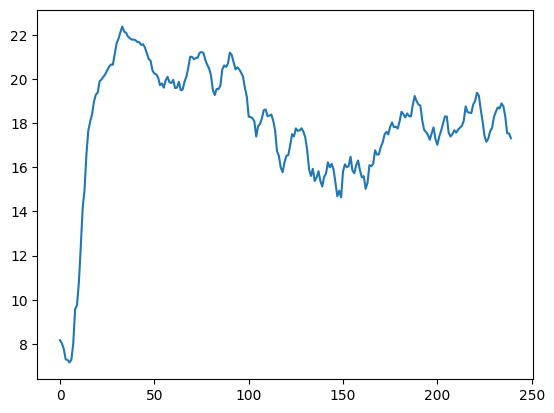

In [ ]:
plt.plot(mm)

In [ ]:
np.std([1,1,2,1,1])

0.4

In [ ]:
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
from scipy.special import kl_div
# gm = GaussianMixture(n_components=2, random_state=0)
# gm.fit(test_after[401][355:355+36,792:792+36])

In [ ]:
from sklearn.cluster import KMeans
# image = test_after[401][355:355+36,792:792+36]
data1 = test_after[399][355:355+36,792:792+36].reshape(-1) 
gmm1 = GaussianMixture(n_components=2,random_state=0)
gmm1.fit(data1.reshape(-1, 1))

data2 = test_after[400][355:355+36,792:792+36].reshape(-1) 
gmm2 = GaussianMixture(n_components=2,random_state=0)
gmm2.fit(data2.reshape(-1, 1))
# labels = gmm1.predict(data.reshape(-1, 1))
# labeled_image = labels.reshape(image.shape[0], image.shape[1])


GaussianMixture(n_components=2, random_state=0)

In [ ]:
from sklearn.cluster import KMeans
# image = test_after[401][355:355+36,792:792+36]
data1 = test_after[15][355:355+36,792:792+36].reshape(-1) 
k1 = KMeans(n_clusters=2,random_state=0,n_init='auto')
k1.fit(data1.reshape(-1, 1))

data2 = test_after[400][355:355+36,792:792+36].reshape(-1) 
k2 = KMeans(n_clusters=2,random_state=0,n_init='auto')
k2.fit(data2.reshape(-1, 1))
# labels = gmm1.predict(data.reshape(-1, 1))
# labeled_image = labels.reshape(image.shape[0], image.shape[1])


KMeans(n_clusters=2, n_init='auto', random_state=0)

In [ ]:
idx = np.argsort(k2.cluster_centers_.sum(axis=1))
lut = np.zeros_like(idx)
lut[idx] = np.arange(2)

In [ ]:
lut

array([0, 1])

In [ ]:
k2.cluster_centers_

array([[13.45393635],
       [73.50980392]])

In [ ]:
from scipy.signal import correlate

In [ ]:
k1.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
correlate(k1.labels_,k2.labels_,mode='valid')[0]

70

In [ ]:
otsu_data = np.zeros_like(test_after)
for i in tqdm(range(otsu_data.shape[0])):
    mm = np.log10(test_after[i]+1)*10
    otsu_data[i] = np.where(mm>threshold_otsu(mm),1,0)

100%|██████████| 500/500 [00:05<00:00, 87.23it/s]


In [ ]:
mm = []
for i in tqdm(range(1,otsu_data.shape[0])):
    data1 = otsu_data[0][355:355+36,792:792+36]
    # k1 = np.where(data1>threshold_otsu(data1),1,0)
    # k1 = KMeans(n_clusters=2,random_state=0,n_init='auto')
    # k1.fit(data1.reshape(-1, 1))

    data2 = otsu_data[i][355:355+36,792:792+36]
    # k2 = np.where(data2>threshold_otsu(data2),1,0)

    mm.append(np.sum(np.abs(data1-data2)))
    

100%|██████████| 499/499 [00:00<00:00, 43401.65it/s]


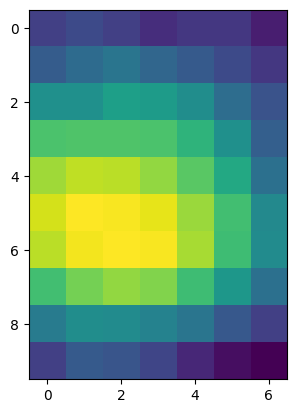

In [ ]:
plt.imshow(test_after[200,365:375,808:815])

In [ ]:
def moving_average(signal, window_size):
    return np.convolve(signal, np.ones(window_size)/window_size, mode='same')

window_size = 5
smoothed_signal = moving_average(mm, window_size)
# print(smoothed_signal)

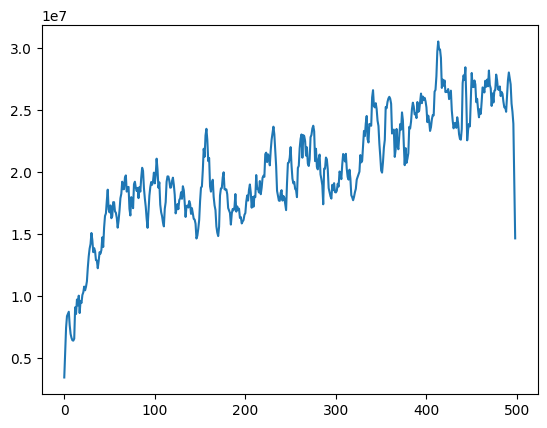

In [ ]:
plt.plot(smoothed_signal)

In [ ]:
mm1 = test_after[:, 371,810]
np.var()

131.36

In [ ]:
np.var(test_after[200:, 361,810])

9.72

In [ ]:
# mm = test_after[:, 371,810]
mm = np.array([1]*250)
gg = test_after[:, 361,810]

# mm = (mm-np.min(mm))/(np.max(mm)-np.min(mm))
gg = (gg-np.min(gg))/(np.max(gg)-np.min(gg))

In [ ]:
k1 = KMeans(n_clusters=2,random_state=0,n_init='auto')
k1.fit(mm.reshape(250, -1))

k2 = KMeans(n_clusters=2,random_state=0,n_init='auto')
k2.fit(gg.reshape(250, -1))

/Users/akapatil/opt/anaconda3/envs/ImageProc_2/lib/python3.11/site-packages/sklearn/base.py:1152: ConvergenceWarning:

Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.



KMeans(n_clusters=2, n_init='auto', random_state=0)

In [ ]:
k1.cluster_centers_[0] - k1.cluster_centers_[1]

array([0.])

In [ ]:
k2.cluster_centers_[0] - k2.cluster_centers_[1]

array([0.28741679])

<StemContainer object of 3 artists>

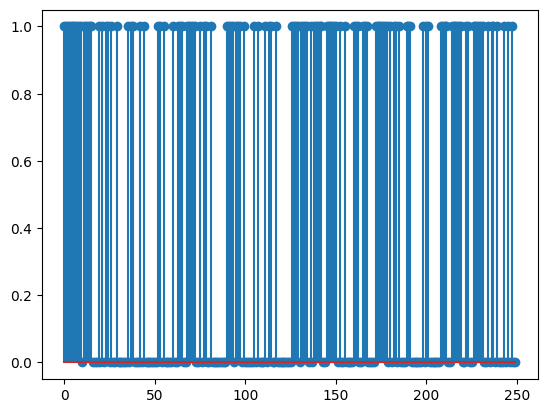

In [ ]:
plt.stem(k1.labels_)

-0.004102261570275787

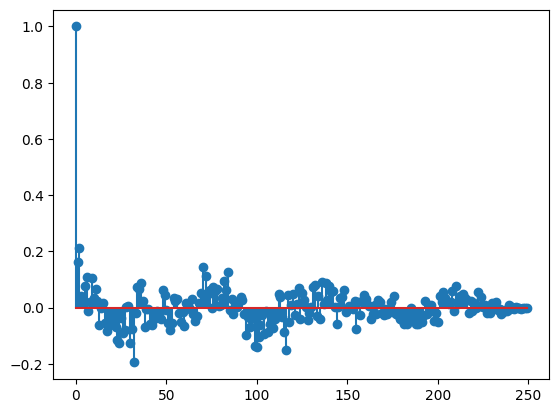

In [ ]:
plt.stem(acf(test_after[:, 361,810],nlags=1000))
np.polyfit(range(len(acf(test_after[:, 361,810],nlags=1000)[:50])),acf(test_after[:, 361,810],nlags=1000)[:50],1)[0]

-0.019338102652362247

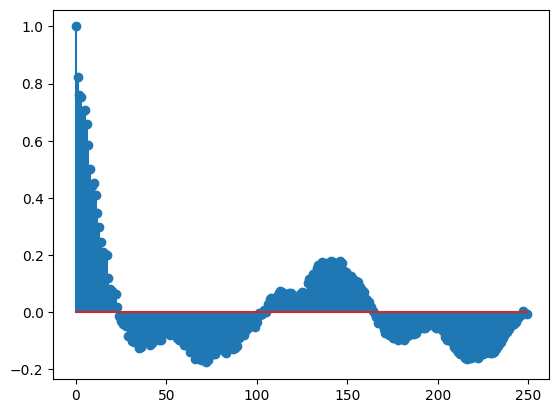

In [ ]:
plt.stem(acf(test_after[:, 371,810],nlags=1000))
np.polyfit(range(len(acf(test_after[:, 371,810],nlags=1000)[:50])),acf(test_after[:, 371,810],nlags=1000)[:50],1)[0]

-0.004102261570275787

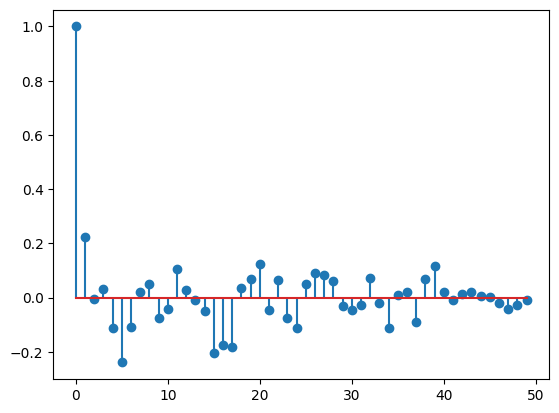

In [ ]:
plt.stem(acf(test_before[:50, 371,810],nlags=1000)[:50])
np.polyfit(range(len(acf(test_after[:, 361,810],nlags=1000)[:50])),acf(test_after[:, 361,810],nlags=1000)[:50],1)[0]

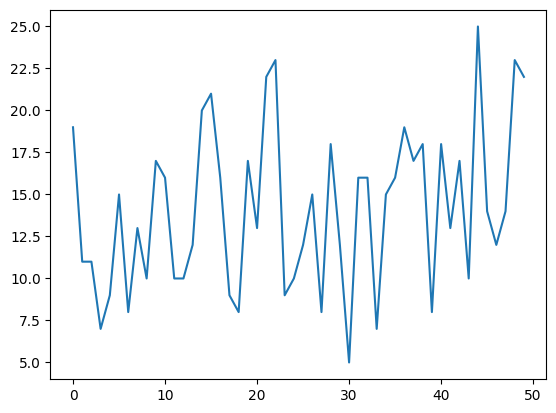

In [ ]:
plt.plot(test_before[:50, 361,810])

In [ ]:
# from sklearn.cluster import KMeans
# import numpy as np
# from tqdm import tqdm

# # Pad the image with zeros to handle edge cases
# padded_test_after = np.pad(test_after, ((0, 0), (10, 10), (10, 10)), mode='constant')

# # Create an empty mask
# mask = np.zeros_like(test_after[0],dtype = np.float32)

# # Loop over pixels
# for x in tqdm(range(10, test_after.shape[1] - 10)):
#     for y in range(10, test_after.shape[2] - 10):
#         correlations = []
#         data1 = padded_test_after[0, x-10:x+10, y-10:y+10]
#         k1 = np.where(data1>threshold_otsu(data1),1,0)
#         for i in range(1,25):
#             data2 = padded_test_after[i, x-10:x+10, y-10:y+10]
#             k2 = np.where(data2>threshold_otsu(data2),1,0)
#             correlations.append(np.correlate(k1.flatten(), k2.flatten(), mode='valid')[0])

#         # Calculate slope for first 50 correlation values
#         slope = np.polyfit(range(len(correlations)), correlations, 1)[0]

#         mask[x-10, y-10] = slope

100%|██████████| 980/980 [16:05<00:00,  1.01it/s]


In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from tqdm import tqdm
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

# Pad the image with zeros to handle edge cases
# padded_test_after = np.pad(test_after, ((0, 0), ,), ,)), mode='constant').astype(np.float32)

# Create an empty mask
mask = np.zeros((3,2,test_after.shape[1],test_after.shape[2]),dtype=np.float32)

# # Loop over pixels
# from warnings import simplefilter

# simplefilter("ignore", category=ConvergenceWarning)

for x in tqdm(range(test_before.shape[1])):
    for y in range(test_before.shape[2]):
        data1 = test_before[:50, x, y]
        data2 = test_before[200:, x, y]
        if np.all(data1 == data1[0]):
            slope1 = 0
        else:
            data1 = (data1-np.min(data1))/(np.max(data1)-np.min(data1))
            slope1 = np.polyfit(range(len(data1)), data1, 1)[0]

        if np.all(data2 == data2[0]):
            slope2 = 0
        else:
            data2 = (data2-np.min(data2))/(np.max(data2)-np.min(data2))
            slope2 = np.polyfit(range(len(data2)), data2, 1)[0]
        mask[0,0,x, y] = -slope1
        mask[0,1,x, y] = -slope2

for x in tqdm(range(test_after.shape[1])):
    for y in range(test_after.shape[2]):
        data1 = test_after[:50, x, y]
        data2 = test_after[200:, x, y]
        if np.all(data1 == data1[0]):
            slope1 = 0
        else:
            data1 = (data1-np.min(data1))/(np.max(data1)-np.min(data1))
            slope1 = np.polyfit(range(len(data1)), data1, 1)[0]

        if np.all(data2 == data2[0]):
            slope2 = 0
        else:
            data2 = (data2-np.min(data2))/(np.max(data2)-np.min(data2))
            slope2 = np.polyfit(range(len(data2)), data2, 1)[0]
        mask[1,0,x, y] = -slope1
        mask[1,1,x, y] = -slope2

for x in tqdm(range(test_after_2min.shape[1])):
    for y in range(test_after_2min.shape[2]):
        data1 = test_after_2min[:50, x, y]
        data2 = test_after_2min[200:, x, y]
        if np.all(data1 == data1[0]):
            slope1 = 0
        else:
            data1 = (data1-np.min(data1))/(np.max(data1)-np.min(data1))
            slope1 = np.polyfit(range(len(data1)), data1, 1)[0]

        if np.all(data2 == data2[0]):
            slope2 = 0
        else:
            data2 = (data2-np.min(data2))/(np.max(data2)-np.min(data2))
            slope2 = np.polyfit(range(len(data2)), data2, 1)[0]
        mask[2,0,x, y] = -slope1
        mask[2,1,x, y] = -slope2

100%|██████████| 1000/1000 [02:02<00:00,  8.14it/s]


(array([   467.,  12410.,  55439., 117475., 208035., 292758., 186105.,
         66915.,  13309.,   1087.]),
 array([-0.02384708, -0.0192135 , -0.01457992, -0.00994634, -0.00531276,
        -0.00067919,  0.00395439,  0.00858797,  0.01322155,  0.01785513,
         0.0224887 ]),
 <BarContainer object of 10 artists>)

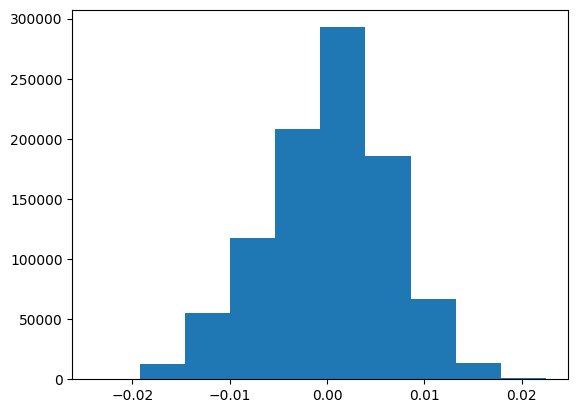

In [ ]:
plt.hist(mask[2,1].flatten())

In [ ]:
mm = mask
mm = (mm-np.min(mm))/(np.max(mm)-np.min(mm))

# mm/=np.max(mm)

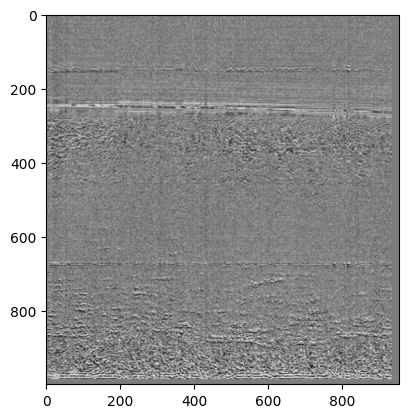

In [ ]:
plt.imshow(mm[0,0],cmap='gray')

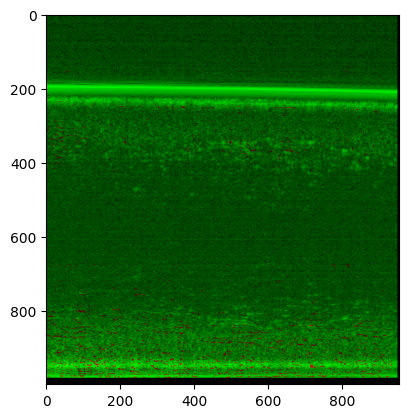

In [ ]:
plt.imshow(get_rgb(mm[0,0],np.log10(random_data(1)+1)).astype(np.uint16))
# plt.axis('off')

In [ ]:
from sklearn.cluster import KMeans

# k1 = KMeans(n_clusters=2,random_state=0,n_init='auto')
# k1.fit(test_after[:,360:380,800:820].reshape(500,-1))

In [ ]:
mm = test_after.copy()
with open('test_after_data_250.pickle', 'wb') as handle:
    pickle.dump(mm, handle, protocol=pickle.HIGHEST_PROTOCOL)

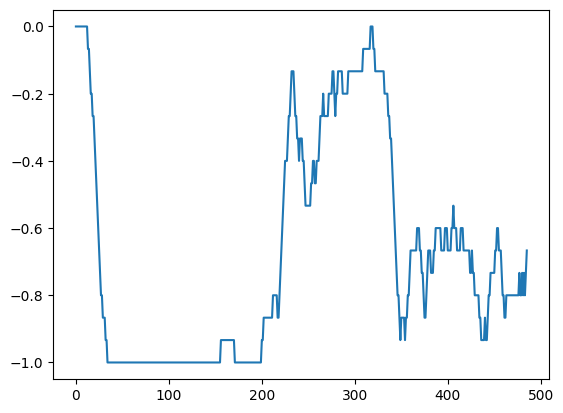

In [ ]:
plt.plot(-(np.convolve(k1.labels_, np.ones(15)/15, mode='valid')))

In [ ]:
mm = -(np.convolve(k1.labels_, np.ones(15)/15, mode='valid'))[:50]
np.polyfit(range(len(mm)),mm,1)[0]

-0.028155262104841948

In [ ]:
from skimage.metrics import normalized_mutual_information as nmi
mm = []
for i in range(1,test_after.shape[0]):
    mm.append(nmi(test_after[0][355:355+36,792:792+36].flatten(),test_after[i][355:355+36,792:792+36].flatten()))

In [ ]:
# mm = [12,13,12,13,12,14,13,13,15]
mm = [12,12,1,1,2,1,1,2,2]
# mm = [12,12,12,12]

In [ ]:
np.polyfit(range(len(mm)),mm,1)[0]

-1.1666666666666674

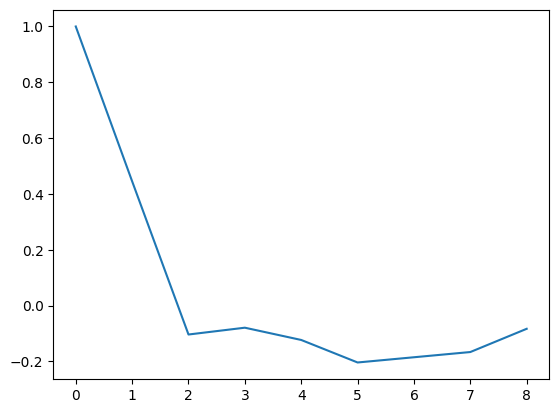

In [ ]:
plt.plot(acf(mm,nlags=1000))

# before drop

In [ ]:
path = '/Users/akapatil/Documents/OCT/pig_eyeball/before-apply_drop/pic1/'
pic_paths = []
for i in os.listdir(path):
    if i.endswith('.dcm') or  i.endswith('.DCM') or i.endswith('.PNG'):
        pic_paths.append(i)
pic_paths = np.array(natsorted(pic_paths))[range(0,len(pic_paths),2)]
pics_without_line = []


for i in tqdm(pic_paths):
    aa = dicom.dcmread(path+i).pixel_array
    pics_without_line.append(aa.copy())

pics_without_line = np.array(pics_without_line)
data_before_drop_100 = pics_without_line[:100]
data_before_drop_800 = pics_without_line[100:500]
data_before_drop_1300 = pics_without_line[500:1300]
data_before_drop_1900 = pics_without_line[1300:1900]
data_before_drop_2200 = pics_without_line[1900:2300]
data_before_drop_remain = pics_without_line[2300:]
# data_before_drop = pics_without_line[range(0,pics_without_line.shape[0],2)]
del pics_without_line

100%|██████████| 2500/2500 [00:06<00:00, 379.42it/s]


304,116

In [ ]:
# rand_range = [250]

# for i in tqdm(range(len(data_before_drop))):
#     coords = phase_cross_correlation(data_before_drop[_],data_before_drop[i],normalization=None)[0]
#     # data_sc1[i] = scp.shift(data_sc1[i],shift = (int(coords[0]),int(coords[1])),mode='nearest',order=0)
#     data_before_drop[i] = scp.shift(data_before_drop[i],shift = (coords[0],coords[1]),mode='constant',order=0)


def phase(data):
    n = data.shape[0]//2
    for i in tqdm(range(data.shape[0])):
        coords = phase_cross_correlation(data[n],data[i],normalization=None)[0]
        data[i] = scp.shift(data[i],shift = (coords[0],coords[1]),mode='constant',order=0)
    return data


In [ ]:
data_before_drop_100 = phase(data_before_drop_100)
data_before_drop_800 = phase(data_before_drop_800)
data_before_drop_1300 = phase(data_before_drop_1300)
data_before_drop_1900 = phase(data_before_drop_1900)
data_before_drop_2200 = phase(data_before_drop_2200)
data_before_drop_remain = phase(data_before_drop_remain)


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:09<00:00, 20.45it/s]


In [ ]:
moving_mask = np.zeros_like(data_before_drop_remain[0])
moving_mask[300:450,400:600] = 1

In [ ]:
def ants_reg(stat,mov):
    ants1 = ants.from_numpy(mov.astype(np.float64))
    ants2 = ants.from_numpy(stat.astype(np.float64))
    mov_mask = ants.from_numpy(moving_mask.astype(np.float64))
    reg = ants_register(ants2,ants1,type_of_transform = 'Translation',moving_mask = mov_mask,mask = mov_mask,mask_all_stages=True)
    reg_img = ants.apply_transforms(ants2, ants1, reg['fwdtransforms'])
    return reg_img.numpy()

def ants_reg_mapping(stat,mov):
    ants1 = ants.from_numpy(mov.astype(np.float64))
    ants2 = ants.from_numpy(stat.astype(np.float64))
    mov_mask = ants.from_numpy(moving_mask.astype(np.float64))
    reg = ants_register(ants2,ants1,type_of_transform = 'Translation')
    # reg_img = ants.apply_transforms(ants2, ants1, reg['fwdtransforms'])
    return reg['fwdtransforms']

def ants_reg_translate(stat,mov,maping):
    ants1 = ants.from_numpy(mov.astype(np.float64))
    ants2 = ants.from_numpy(stat.astype(np.float64))
    mov_mask = ants.from_numpy(moving_mask.astype(np.float64))
    # reg = ants_register(ants2,ants1,type_of_transform = 'Translation',moving_mask = mov_mask,mask = mov_mask,mask_all_stages=True)
    reg_img = ants.apply_transforms(ants2, ants1, maping,interpolator='nearestNeighbor')
    return reg_img.numpy()

In [ ]:
# reg_before_drop = []
# for i in tqdm(range(0,data_before_drop.shape[0])):
#     regis = ants_reg(data_before_drop[1250],data_before_drop[i])
#     reg_before_drop.append(regis)
# reg_before_drop = np.array(reg_before_drop)
# del data_before_drop

def reg(data):
    reg_after_drop1 = []
    n = data.shape[0]//2
    for i in tqdm(range(0,data.shape[0])):
        regis = ants_reg(data[n],data[i])
        reg_after_drop1.append(regis)
    reg_after_drop1 = np.array(reg_after_drop1)
    return reg_after_drop1

In [ ]:
data_before_drop_100 = reg(data_before_drop_100)
data_before_drop_800 = reg(data_before_drop_800)
data_before_drop_1300 = reg(data_before_drop_1300)
data_before_drop_1900 = reg(data_before_drop_1900)
data_before_drop_2200 = reg(data_before_drop_2200)
data_before_drop_remain = reg(data_before_drop_remain)


100%|██████████| 200/200 [01:56<00:00,  1.71it/s]


In [ ]:
# del data_before_drop

In [ ]:
test1 = []
map1 = ants_reg_mapping(data_before_drop_800[0],data_before_drop_100[-1])
for i in tqdm(range(data_before_drop_100.shape[0])):
    test1.append(ants_reg_translate(data_before_drop_800[0],data_before_drop_100[i],map1))
for i in tqdm(range(data_before_drop_800.shape[0])):
    test1.append(data_before_drop_800[i])


test2=[]
map2 = ants_reg_mapping(data_before_drop_1300[0],test1[-1])
for i in tqdm(range(len(test1))):
    test2.append(ants_reg_translate(data_before_drop_1300[0],test1[i],map2))
for i in tqdm(range(data_before_drop_1300.shape[0])):
    test2.append(data_before_drop_1300[i])

del test1

test3=[]
map3 = ants_reg_mapping(data_before_drop_1900[0],test2[-5])
for i in tqdm(range(len(test2))):
    test3.append(ants_reg_translate(data_before_drop_1900[0],test2[i],map3))
for i in tqdm(range(data_before_drop_1900.shape[0])):
    test3.append(data_before_drop_1900[i])

del test2

test4 = []
map4 = ants_reg_mapping(data_before_drop_2200[0],test3[-1])
for i in tqdm(range(len(test3))):
    test4.append(ants_reg_translate(data_before_drop_2200[0],test3[i],map4))
for i in tqdm(range(data_before_drop_2200.shape[0])):
    test4.append(data_before_drop_2200[i])

del test3

test5 = []
map5 = ants_reg_mapping(data_before_drop_remain[0],test4[-1])
for i in tqdm(range(len(test4))):
    test5.append(ants_reg_translate(data_before_drop_remain[0],test4[i],map5))
for i in tqdm(range(data_before_drop_remain.shape[0])):
    test5.append(data_before_drop_remain[i])

del test4

100%|██████████| 200/200 [00:00<00:00, 454420.80it/s]


In [ ]:
# phase_cross_correlation(test1[0][300:450,:],test1[96][300:450,:])[0]

In [ ]:
# def phase_correct(data):
#     # n = data.shape[0]//2
#     for i in tqdm(range(1,data.shape[0])):
#         coords = phase_cross_correlation(data[i-1],data[i])[0]
#         if np.abs(coords[0])>=4:
#             print(i)
#             data[i] = scp.shift(data[i],shift = (coords[0],0),mode='constant',order=0)
#     return data
# test1 = phase_correct(np.array(test1))

In [ ]:
# os.mkdir('2D/2D_timelapse_postsolution/registered/scan2/')
for i,j in tqdm(enumerate(test5)):
    cv2.imwrite('/Users/akapatil/Documents/OCT/pig_eyeball/registered/before/'+f'frame_test{i}.PNG',j.astype(np.uint16))

2500it [01:13, 34.08it/s]


In [ ]:
liv_mask_before_eye, log_before_eye = gen_liv(reg_before_drop)

100%|██████████| 500/500 [00:00<00:00, 2656.68it/s]


(1000, 954)


In [ ]:
np.unique(liv_mask_before_eye)

array([1.8694897e-03, 2.0025407e-03, 2.0574215e-03, ..., 2.3135243e+02,
       2.3263284e+02, 2.4851071e+02], dtype=float32)

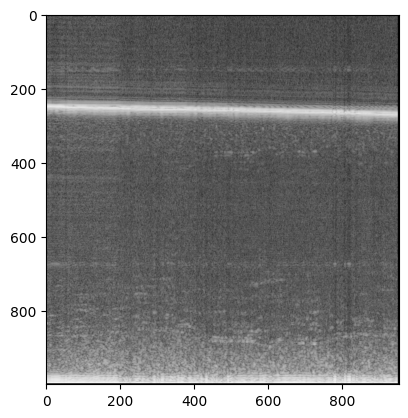

In [ ]:
plt.imshow(log_before_eye[10],cmap='gray')

# after drop 1

In [ ]:
# Loading the dataset
path = '/Users/akapatil/Documents/OCT/pig_eyeball/after_apply_drop_1/pic1/'
pic_paths = []
for i in os.listdir(path):
    if i.endswith('.dcm') or  i.endswith('.DCM') or i.endswith('.PNG'):
        pic_paths.append(i)
pic_paths = np.array(natsorted(pic_paths))[range(0,len(pic_paths),2)]

# reading all te dicom images
pics_without_line = []
for i in tqdm(pic_paths):
    aa = dicom.dcmread(path+i).pixel_array
    pics_without_line.append(aa.copy())

# Breaking down the dataset into parts
# Need to do it manually after checking registration
pics_without_line = np.array(pics_without_line)
data_after_drop1_50 = pics_without_line[:50]
data_after_drop1_90 = pics_without_line[50:100]
data_after_drop1_100 = pics_without_line[100:200]
data_after_drop1_500 = pics_without_line[200:500]
data_after_drop1_1250 = pics_without_line[500:1250]
data_after_drop1_1650 = pics_without_line[1250:1650]
data_after_drop1_remain = pics_without_line[1650:]

# Try to delete unnecessary/repeated variables to keep memory usage low
del pics_without_line


 25%|██▌       | 625/2500 [00:01<00:05, 344.36it/s]


KeyboardInterrupt: 

In [ ]:
# Performing Phase registration first to make affine more efficient

def phase(data):
    n = data.shape[0]//2
    for i in tqdm(range(data.shape[0])):
        coords = phase_cross_correlation(data[n],data[i],normalization=None)[0]
        data[i] = scp.shift(data[i],shift = (coords[0],coords[1]),mode='constant',order=0)
    return data

data_after_drop1_50 = phase(data_after_drop1_50)
data_after_drop1_90 = phase(data_after_drop1_90)
data_after_drop1_100 = phase(data_after_drop1_100)
data_after_drop1_500 = phase(data_after_drop1_500)
data_after_drop1_1250 = phase(data_after_drop1_1250)
data_after_drop1_1650 = phase(data_after_drop1_1650)
data_after_drop1_remain = phase(data_after_drop1_remain)

In [ ]:
data_after_drop1_100.shape

(100, 1000, 954)

252,227

In [ ]:
# define mask for registration
# you can select any patch in the data you want, the smaller the more faster algorithm is
# I have not tried different patches, so you can definitely try more, also you can use different patches for different datasets


moving_mask = np.zeros_like(data_after_drop1_100[0])
moving_mask[300:450,400:600] = 1

NameError: name 'data_after_drop1_100' is not defined

In [ ]:
# Main Registration fucntion that registers the individual chunks
def ants_reg(stat,mov):
    ants1 = ants.from_numpy(mov.astype(np.float64))
    ants2 = ants.from_numpy(stat.astype(np.float64))
    mov_mask = ants.from_numpy(moving_mask.astype(np.float64))
    reg = ants_register(ants2,ants1,type_of_transform = 'Translation',moving_mask = mov_mask,mask = mov_mask,mask_all_stages=True)
    reg_img = ants.apply_transforms(ants2, ants1, reg['fwdtransforms'])
    return reg_img.numpy()

# Registration fucntion that calculates the mapping between two consecutuive chunks
def ants_reg_mapping(stat,mov):
    ants1 = ants.from_numpy(mov.astype(np.float64))
    ants2 = ants.from_numpy(stat.astype(np.float64))
    mov_mask = ants.from_numpy(moving_mask.astype(np.float64))
    reg = ants_register(ants2,ants1,type_of_transform = 'Translation')
    # reg_img = ants.apply_transforms(ants2, ants1, reg['fwdtransforms'])
    return reg['fwdtransforms']

# Registration fucntion that maps the mapping to the previous chunk
def ants_reg_translate(stat,mov,maping):
    ants1 = ants.from_numpy(mov.astype(np.float64))
    ants2 = ants.from_numpy(stat.astype(np.float64))
    mov_mask = ants.from_numpy(moving_mask.astype(np.float64))
    # reg = ants_register(ants2,ants1,type_of_transform = 'Translation',moving_mask = mov_mask,mask = mov_mask,mask_all_stages=True)
    reg_img = ants.apply_transforms(ants2, ants1, maping,interpolator='nearestNeighbor')
    return reg_img.numpy()

# running the registration for a chunk
def reg(data):
    reg_after_drop1 = []
    n = data.shape[0]//2
    for i in tqdm(range(0,data.shape[0])):
        regis = ants_reg(data[n],data[i])
        reg_after_drop1.append(regis)
    reg_after_drop1 = np.array(reg_after_drop1)
    return reg_after_drop1

In [ ]:
data_after_drop1_50 = reg(data_after_drop1_50)
data_after_drop1_90 = reg(data_after_drop1_90)
data_after_drop1_100 = reg(data_after_drop1_100)
data_after_drop1_500 = reg(data_after_drop1_500)
data_after_drop1_1250 = reg(data_after_drop1_1250)
data_after_drop1_1650 = reg(data_after_drop1_1650)
data_after_drop1_remain = reg(data_after_drop1_remain)


100%|██████████| 850/850 [05:40<00:00,  2.50it/s]


In [ ]:
# Registering two consecutuive chunks by calculating the mapping between last image of prev chunk and the first image of next chunk
# Then apply the mapping to all images in the prev chunk.

test00 = []
map00 = ants_reg_mapping(data_after_drop1_90[0],data_after_drop1_50[-1])
for i in tqdm(range(data_after_drop1_50.shape[0])):
    test00.append(ants_reg_translate(data_after_drop1_90[0],data_after_drop1_50[i],map00))
for i in tqdm(range(data_after_drop1_90.shape[0])):
    test00.append(data_after_drop1_90[i])


test0 = []
map0 = ants_reg_mapping(data_after_drop1_100[0],test00[-1])
for i in tqdm(range(len(test00))):
    test0.append(ants_reg_translate(data_after_drop1_100[0],test00[i],map0))
for i in tqdm(range(data_after_drop1_100.shape[0])):
    test0.append(data_after_drop1_100[i])

del test00


test1 = []
map1 = ants_reg_mapping(data_after_drop1_500[0],test0[-1])
for i in tqdm(range(len(test0))):
    test1.append(ants_reg_translate(data_after_drop1_500[0],test0[i],map1))
for i in tqdm(range(data_after_drop1_500.shape[0])):
    test1.append(data_after_drop1_500[i])

del test0

test2=[]
map2 = ants_reg_mapping(data_after_drop1_1250[0],test1[-1])
for i in tqdm(range(len(test1))):
    test2.append(ants_reg_translate(data_after_drop1_1250[0],test1[i],map2))
for i in tqdm(range(data_after_drop1_1250.shape[0])):
    test2.append(data_after_drop1_1250[i])

del test1

test3=[]
map3 = ants_reg_mapping(data_after_drop1_1650[0],test2[-1])
for i in tqdm(range(len(test2))):
    test3.append(ants_reg_translate(data_after_drop1_1650[0],test2[i],map3))
for i in tqdm(range(data_after_drop1_1650.shape[0])):
    test3.append(data_after_drop1_1650[i])

del test2

test4 = []
map4 = ants_reg_mapping(data_after_drop1_remain[0],test3[-1])
for i in tqdm(range(len(test3))):
    test4.append(ants_reg_translate(data_after_drop1_remain[0],test3[i],map4))
for i in tqdm(range(data_after_drop1_remain.shape[0])):
    test4.append(data_after_drop1_remain[i])

del test3

100%|██████████| 850/850 [00:00<00:00, 2225442.20it/s]


In [ ]:
# Save the images, make sure you save them uint16

# os.mkdir('2D/2D_timelapse_postsolution/registered/scan2/')
for i,j in tqdm(enumerate(test4)):
    cv2.imwrite('/Users/akapatil/Documents/OCT/pig_eyeball/test/'+f'frame_test{i}.PNG',j.astype(np.uint16))

2500it [01:14, 33.52it/s]


# after_drop_2min

In [ ]:
path = '/Users/akapatil/Documents/OCT/pig_eyeball/after_apply_drop_2_2min/pic1/'
pic_paths = []
for i in os.listdir(path):
    if i.endswith('.dcm') or  i.endswith('.DCM') or i.endswith('.PNG'):
        pic_paths.append(i)
pic_paths = np.array(natsorted(pic_paths))[range(0,len(pic_paths),2)]
pics_without_line = []


for i in tqdm(pic_paths):
    aa = dicom.dcmread(path+i).pixel_array
    pics_without_line.append(aa.copy())

pics_without_line = np.array(pics_without_line)
data_2min_drop = pics_without_line[:540]
data_2min_drop_640 = pics_without_line[540:640]
data_2min_drop_1250 = pics_without_line[640:1250]
data_2min_drop_2050 = pics_without_line[1250:2050]
data_2min_drop_remain = pics_without_line[2050:]

del pics_without_line

100%|██████████| 2499/2499 [00:05<00:00, 499.06it/s]


In [ ]:
def phase(data):
    n = data.shape[0]//2
    for i in tqdm(range(data.shape[0])):
        coords = phase_cross_correlation(data[n],data[i],normalization=None)[0]
        data[i] = scp.shift(data[i],shift = (coords[0],coords[1]),mode='constant',order=0)
    return data


In [ ]:
data_2min_drop = phase(data_2min_drop)
data_2min_drop_640 = phase(data_2min_drop_640)
data_2min_drop_1250 = phase(data_2min_drop_1250)
data_2min_drop_2050 = phase(data_2min_drop_2050)
data_2min_drop_remain = phase(data_2min_drop_remain)

100%|██████████| 449/449 [00:20<00:00, 21.53it/s]


In [ ]:
moving_mask = np.zeros_like(data_2min_drop_remain[0])
moving_mask[300:450,400:600] = 1

In [ ]:
def ants_reg(stat,mov):
    ants1 = ants.from_numpy(mov.astype(np.float64))
    ants2 = ants.from_numpy(stat.astype(np.float64))
    mov_mask = ants.from_numpy(moving_mask.astype(np.float64))
    reg = ants_register(ants2,ants1,type_of_transform = 'Translation',moving_mask = mov_mask,mask = mov_mask,mask_all_stages=True)
    reg_img = ants.apply_transforms(ants2, ants1, reg['fwdtransforms'])
    return reg_img.numpy()

def ants_reg_mapping(stat,mov):
    ants1 = ants.from_numpy(mov.astype(np.float64))
    ants2 = ants.from_numpy(stat.astype(np.float64))
    mov_mask = ants.from_numpy(moving_mask.astype(np.float64))
    reg = ants_register(ants2,ants1,type_of_transform = 'Translation')
    # reg_img = ants.apply_transforms(ants2, ants1, reg['fwdtransforms'])
    return reg['fwdtransforms']

def ants_reg_translate(stat,mov,maping):
    ants1 = ants.from_numpy(mov.astype(np.float64))
    ants2 = ants.from_numpy(stat.astype(np.float64))
    mov_mask = ants.from_numpy(moving_mask.astype(np.float64))
    # reg = ants_register(ants2,ants1,type_of_transform = 'Translation',moving_mask = mov_mask,mask = mov_mask,mask_all_stages=True)
    reg_img = ants.apply_transforms(ants2, ants1, maping,interpolator='nearestNeighbor')
    return reg_img.numpy()

In [ ]:
def reg(data):
    reg_after_drop1 = []
    n = data.shape[0]//2
    for i in tqdm(range(0,data.shape[0])):
        regis = ants_reg(data[n],data[i])
        reg_after_drop1.append(regis)
    reg_after_drop1 = np.array(reg_after_drop1)
    return reg_after_drop1

In [ ]:
data_2min_drop = reg(data_2min_drop)
data_2min_drop_640 = reg(data_2min_drop_640)
data_2min_drop_1250 = reg(data_2min_drop_1250)
data_2min_drop_2050 = reg(data_2min_drop_2050)
data_2min_drop_remain = reg(data_2min_drop_remain)

100%|██████████| 449/449 [03:08<00:00,  2.39it/s]


In [ ]:
test0 = []
map0 = ants_reg_mapping(data_2min_drop_640[0],data_2min_drop[-1])
for i in tqdm(range(data_2min_drop.shape[0])):
    test0.append(ants_reg_translate(data_2min_drop_640[0],data_2min_drop[i],map0))
for i in tqdm(range(data_2min_drop_640.shape[0])):
    test0.append(data_2min_drop_640[i])

test1=[]
map1 = ants_reg_mapping(data_2min_drop_1250[0],test0[-1])
for i in tqdm(range(len(test0))):
    test1.append(ants_reg_translate(data_2min_drop_1250[0],test0[i],map1))
for i in tqdm(range(data_2min_drop_1250.shape[0])):
    test1.append(data_2min_drop_1250[i])

del test0

test2=[]
map2 = ants_reg_mapping(data_2min_drop_2050[0],test1[-1])
for i in tqdm(range(len(test1))):
    test2.append(ants_reg_translate(data_2min_drop_2050[0],test1[i],map2))
for i in tqdm(range(data_2min_drop_2050.shape[0])):
    test2.append(data_2min_drop_2050[i])

del test1

test3=[]
map3 = ants_reg_mapping(data_2min_drop_remain[0],test2[-1])
for i in tqdm(range(len(test2))):
    test3.append(ants_reg_translate(data_2min_drop_remain[0],test2[i],map3))
for i in tqdm(range(data_2min_drop_remain.shape[0])):
    test3.append(data_2min_drop_remain[i])

del test2

# test4 = []
# map4 = ants_reg_mapping(data_after_drop1_remain[0],test3[-1])
# for i in tqdm(range(len(test3))):
#     test4.append(ants_reg_translate(data_after_drop1_remain[0],test3[i],map4))
# for i in tqdm(range(data_after_drop1_remain.shape[0])):
#     test4.append(data_after_drop1_remain[i])

# del test3

100%|██████████| 449/449 [00:00<00:00, 2014163.10it/s]


In [ ]:
for i,j in tqdm(enumerate(test3)):
    cv2.imwrite('/Users/akapatil/Documents/OCT/pig_eyeball/registered/after_2min/'+f'frame_test{i}.PNG',j.astype(np.uint16))

2499it [01:11, 35.14it/s]


# trying

In [ ]:
path = '/Users/akapatil/Documents/OCT/pig_eyeball/registered/after/'
pic_paths = []
for i in os.listdir(path):
    if i.endswith('.dcm') or  i.endswith('.DCM') or i.endswith('.PNG'):
        pic_paths.append(i)
pics_without_line = []


for i in tqdm(pic_paths):
    aa = cv2.imread(path+i,cv2.IMREAD_UNCHANGED)
    # aa = dicom.dcmread(path+i).pixel_array
    pics_without_line.append(aa.copy())

pics_without_line = np.array(pics_without_line)
# data_2min_drop = pics_without_line[:550]
# data_2min_drop_1250 = pics_without_line[550:1250]
# data_2min_drop_2050 = pics_without_line[1250:2050]
# data_2min_drop_remain = pics_without_line[2050:]

# del pics_without_line

  0%|          | 0/2500 [00:00<?, ?it/s]

100%|██████████| 2500/2500 [00:35<00:00, 70.13it/s]


In [ ]:
from skimage.metrics import mean_squared_error as mse
from scipy.signal import correlate2d, correlate

In [ ]:
mm = []
for i in range(0,pics_without_line.shape[0]):
    mm.append(correlate2d(pics_without_line[0,360:390,480:520], pics_without_line[i,360:390,480:520],mode='valid')[0][0])

In [ ]:
from skimage.filters import threshold_otsu as otsu 

In [ ]:
g1 = pics_without_line[1204,360:390,480:520]
g2 = pics_without_line[1205,360:390,480:520]
g1 = np.where(g1<otsu(g1,nbins = 65536),0,1)
g2 = np.where(g2<otsu(g2,nbins = 65536),0,1)

In [ ]:
def gen_liv(arr):
    def liv_calc(pp):
        return(10*(np.log10(pp+1)))
    log_pics = list(map(liv_calc,arr))
    arrays_np = np.array(log_pics)
    average_across_arrays = np.mean(arrays_np, axis=0)
    

    liv_mask = np.zeros_like(average_across_arrays)
    for j in tqdm(range(len(log_pics))):
        liv_mask += (log_pics[j] - average_across_arrays)**2
    liv_mask/=len(log_pics)
    # print(liv_mask.shape)
    return liv_mask , np.array(log_pics)

In [ ]:
liv_mask_before_eye, log_before_eye = gen_liv(pics_without_line)

100%|██████████| 2500/2500 [00:22<00:00, 108.98it/s]


In [ ]:
# liv_mask_before_eye = (liv_mask_before_eye - np.min(liv_mask_before_eye)) / (np.max(liv_mask_before_eye) - np.min(liv_mask_before_eye))

(array([5.54870e+04, 2.86803e+05, 5.45958e+05, 5.06920e+04, 1.01520e+04,
        2.93200e+03, 1.01000e+03, 3.90000e+02, 3.12000e+02, 2.64000e+02]),
 array([ 0.        ,  1.31972098,  2.63944197,  3.95916271,  5.27888393,
         6.59860468,  7.91832542,  9.23804665, 10.55776787, 11.87748814,
        13.19720936]),
 <BarContainer object of 10 artists>)

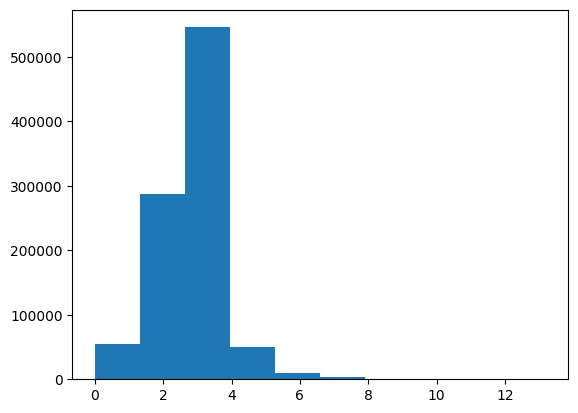

In [ ]:
plt.hist(liv_mask_before_eye.flatten())

In [ ]:
# liv_mask_before_eye[liv_mask_before_eye>np.percentile(liv_mask_before_eye,99.9)]=0

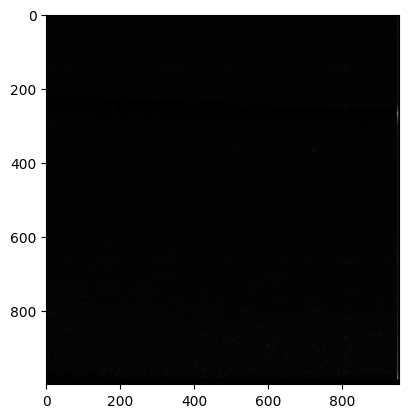

In [ ]:
plt.imshow(liv_mask_before_eye,cmap='gray')

In [ ]:
sample_data = np.zeros_like(pics_without_line[:200])
sample_data[:100,300:400,400:600] = 1
sample_data[100:,350:400,400:600] = 1
liv_sample, log_sample = gen_liv(sample_data)
sample_acf = gen_acf(log_sample,log_sample)

100%|██████████| 200/200 [00:00<00:00, 1552.03it/s]


(1000, 954)


In [ ]:
def get_rgb(mask,img):
    mask[mask>np.percentile(mask,99)]=0
    mask = mask/np.max(mask)
    h = (mask*180).astype(np.float32)
    s = np.full_like(mask,255)
    v = ((img - np.min(img)) / (np.max(img) - np.min(img)))*255
    # v = (img/np.max(img))*255
    hsv_img = np.dstack((h,s,v))
    rgb_image = cv2.cvtColor(hsv_img.astype(np.float32), cv2.COLOR_HSV2RGB)
    return rgb_image

In [ ]:
rgb = get_rgb(acf[0],np.log10(pics_without_line[2200]+1))
rgb[rgb<0]=0

In [ ]:
# mm = np.zeros_like(pics_without_line[0])
# for i in range(700,800):
#     mm+=np.abs(pics_without_line[i]-pics_without_line[i+1])

# mm = mm/100

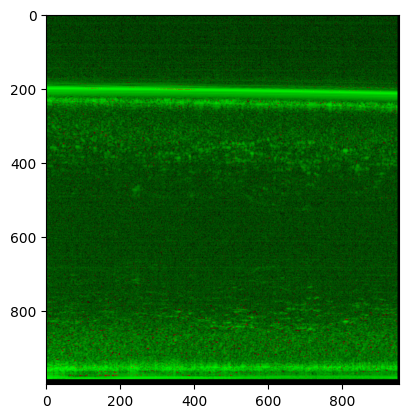

In [ ]:
plt.imshow(rgb.astype(np.uint16))

In [ ]:
from statsmodels.tsa.stattools import acf
def gen_acf(log_arr_early,log_arr_late):
    acf_mask = np.zeros((2,log_arr_early.shape[1],log_arr_early.shape[2]))
    for i in tqdm(range(log_arr_early.shape[1])):
        for j in range(log_arr_early.shape[2]):
            temp_cov_e = log_arr_early[:,i,j]
            temp_cov_l = log_arr_late[:,i,j]
            corr_vals_e = acf(temp_cov_e,nlags = len(temp_cov_e),fft =True)
            corr_vals_l = acf(temp_cov_l,nlags = len(temp_cov_l),fft =True)
            slope_e, intercept = np.polyfit(range(len(corr_vals_e)),np.array(corr_vals_e),deg=1)
            slope_l, intercept = np.polyfit(range(len(corr_vals_l)),np.array(corr_vals_l),deg=1)

            acf_mask[0,i,j] = slope_e

            acf_mask[1,i,j] = slope_l
    acf_mask[np.isnan(acf_mask)] = 0
    return acf_mask

In [ ]:
temp_cov_e = np.array([1,2,3,4])
# mm = 
corr_vals_e = acf(temp_cov_e,nlags = len(temp_cov_e),fft =True)
np.polyfit(range(len(corr_vals_e)),np.array(corr_vals_e),deg=1)[0]

-0.49

<StemContainer object of 3 artists>

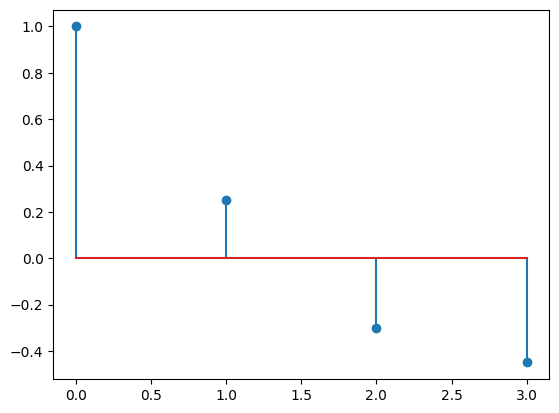

In [ ]:
plt.stem(corr_vals_e)

In [ ]:
import skimage.io as io
import skimage.color as color
from skimage.registration import optical_flow_ilk
import matplotlib.pyplot as plt


In [ ]:
zero_line = []
for i in tqdm(range(pics_without_line.shape[0])):
    for row in range(pics_without_line[i].shape[0]-1,-1,-1):
        if np.any(pics_without_line[i][row,:]!=0):
            zero_line.append(row)
            break
zero_line = np.min(zero_line)

pics_without_line[:,zero_line:,:] =  0

100%|██████████| 2500/2500 [00:00<00:00, 23764.46it/s]


In [ ]:
flow = optical_flow_ilk(pics_without_line[0], pics_without_line[2200])
flow_u = flow[0]  # Horizontal component
flow_v = flow[1] 
magnitude = np.sqrt(flow_u**2 + flow_v**2)


In [ ]:
plt.imshow(np.abs(pics_without_line[700]-pics_without_line[701]),cmap='gray')

NameError: name 'pics_without_line' is not defined

In [ ]:
temp_cov_e = log_before_eye[700:800,363-2:363+3,493-2:493+3]
# temp_cov_e = np.ones((100,))
mm = []
for i in range(0,temp_cov_e.shape[0]):
    mm.append(correlate2d(temp_cov_e[0], temp_cov_e[i],mode='valid')[0][0])

In [ ]:
acf = gen_acf(log_before_eye[1200:1300],log_before_eye[2400:])

100%|██████████| 1000/1000 [02:29<00:00,  6.68it/s]


In [ ]:
acf = np.abs(acf)

In [ ]:
# acf = (acf - np.min(acf)) / (np.max(acf) - np.min(acf))

In [ ]:
# acf[0][acf[0]>np.percentile(acf[0],99.9)]=0

(array([2.07860e+04, 7.77350e+05, 1.29846e+05, 2.10130e+04, 3.97500e+03,
        8.27000e+02, 1.68000e+02, 2.50000e+01, 8.00000e+00, 2.00000e+00]),
 array([0.        , 0.00033025, 0.00066051, 0.00099076, 0.00132102,
        0.00165127, 0.00198153, 0.00231178, 0.00264204, 0.00297229,
        0.00330255]),
 <BarContainer object of 10 artists>)

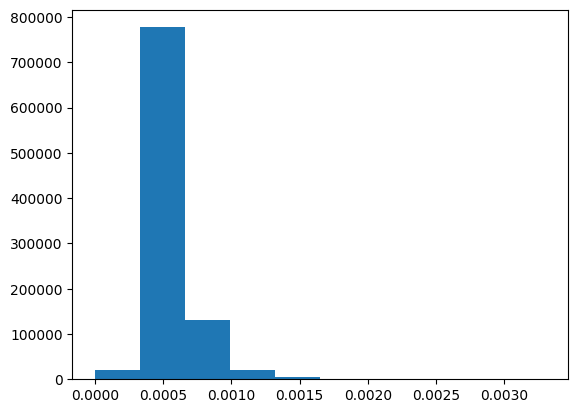

In [ ]:
plt.hist(acf[0].flatten())

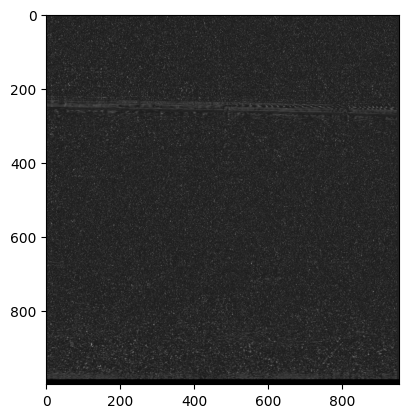

In [ ]:
plt.imshow(acf[0],cmap='gray')

In [ ]:
temp_data = load_data(0)

100%|██████████| 2500/2500 [00:01<00:00, 1640.36it/s]


In [ ]:
# del temp_data

258,516

In [ ]:
pp = [100]*10
pp[5] = 0.3

In [ ]:

np.polyfit(range(len(acf(pp,nlags = len(temp_data),fft =True))),np.array(acf(pp,nlags = len(temp_data),fft =True)),deg=1)

array([-0.03872054,  0.22424242])

<StemContainer object of 3 artists>

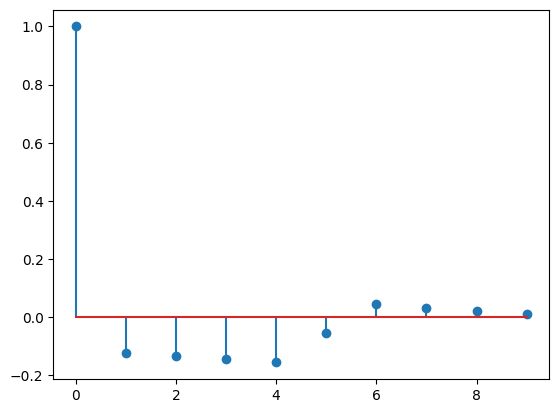

In [ ]:
plt.stem(acf(pp,nlags = len(temp_data),fft =True))

# clean code

In [1]:
def load_data(path_num,range_frames=None,dis=False):
    if path_num==0:
        path = '/Users/akapatil/Documents/OCT/pig_eyeball/registered/before/'
    elif path_num==1:
        path = '/Users/akapatil/Documents/OCT/pig_eyeball/registered/after/'
        # print('after data')
    elif path_num==2:
        path = '/Users/akapatil/Documents/OCT/pig_eyeball/registered/after_2min/'
    pic_paths = []
    for i in os.listdir(path):
        if i.endswith('.dcm') or  i.endswith('.DCM') or i.endswith('.PNG'):
            pic_paths.append(i)
    pic_paths = natsorted(pic_paths)
    if range_frames:
        pic_paths = pic_paths[range_frames-50:range_frames+50]
    pics_without_line = []

    for i in tqdm(pic_paths,desc='Loading data',disable=dis):
        aa = cv2.imread(path+i,cv2.IMREAD_UNCHANGED)
        # aa = dicom.dcmread(path+i).pixel_array
        pics_without_line.append(aa.copy())

    pics_without_line = np.array(pics_without_line).astype(np.float32)
    zero_line_down= []
    zero_line_up = []
    zero_line_left = []
    zero_line_right = []
    for i in tqdm(range(pics_without_line.shape[0]),desc='cleaning',disable=dis):
        for down in range(pics_without_line[i].shape[0]-1,-1,-1):
            if np.any(pics_without_line[i][down,:]!=0):
                zero_line_down.append(down)
                break
        for up in range(0,pics_without_line[i].shape[0]):
            if np.any(pics_without_line[i][up,:]!=0):
                zero_line_up.append(up)
                break
        for left in range(0,pics_without_line[i].shape[1]):
            if np.any(pics_without_line[i][:,left]!=0):
                zero_line_left.append(left)
                break
        for right in range(pics_without_line[i].shape[1]-1,-1,-1):
            if np.any(pics_without_line[i][:,right]!=0):
                zero_line_right.append(right)
                break
    zero_line_down = np.min(zero_line_down)
    zero_line_up = np.min(zero_line_up)
    zero_line_left = np.min(zero_line_left)
    zero_line_right = np.min(zero_line_right)
    pics_without_line[:,zero_line_down:,:] =  0
    pics_without_line[:,:zero_line_up,:] =  0
    pics_without_line[:,:,:zero_line_left] =  0
    pics_without_line[:,:,zero_line_right:] =  0

    return pics_without_line


def random_data(path_num,frame_num=None):
    if path_num==0:
        path = '/Users/akapatil/Documents/OCT/pig_eyeball/registered/before/'
    elif path_num==1:
        path = '/Users/akapatil/Documents/OCT/pig_eyeball/registered/after/'
    elif path_num==2:
        path = '/Users/akapatil/Documents/OCT/pig_eyeball/registered/after_2min/'
    pic_paths = []
    for i in os.listdir(path):
        if i.endswith('.dcm') or  i.endswith('.DCM') or i.endswith('.PNG'):
            pic_paths.append(i)
    # pics_without_line = []
    if frame_num:
        pic_rand = pic_paths[frame_num]
    else:
        pic_rand = pic_paths[np.random.randint(0,len(pic_paths))]
    aa = cv2.imread(path+pic_rand,cv2.IMREAD_UNCHANGED)
    pics_without_line = np.array(aa)

    return pics_without_line


def gen_liv(arr):
    def liv_calc(pp):
        return(10*(np.log10(pp+1)))
    log_pics = list(map(liv_calc,arr))
    arrays_np = np.array(log_pics)
    average_across_arrays = np.mean(arrays_np, axis=0)
    

    liv_mask = np.zeros_like(average_across_arrays)
    for j in tqdm(range(len(log_pics)),desc='Liv'):
        liv_mask += (log_pics[j] - average_across_arrays)**2
    liv_mask/=len(log_pics)
    # print(liv_mask.shape)
    # , np.array(log_pics)
    return -1*liv_mask



def get_rgb(mask,img,percent = 99.9):
    temp_mask = mask.copy()
    # temp_mask[temp_mask>np.percentile(temp_mask,percent)]=0
    # temp_mask = temp_mask/np.max(temp_mask)
    h = (temp_mask*90).astype(np.float32)
    s = np.full_like(temp_mask,1).astype(np.float32)
    v = (((img - np.min(img)) / (np.max(img) - np.min(img)))*1).astype(np.float32)
    # v = (img/np.max(img))*255
    hsv_img = np.dstack((h,s,v))
    rgb_image = cv2.cvtColor(hsv_img.astype(np.float32), cv2.COLOR_HSV2RGB)
    rgb_image = np.where(rgb_image==1,1,0)
    return rgb_image

def find_longest_patch(arr):
    def calc_st_ed(arr,num):
        max_length = 0
        current_length = 0
        start = -1
        end = -1
        for i, elem in enumerate(arr):
            if elem == num:
                current_length += 1
            else:
                if current_length > max_length:
                    max_length = current_length
                    start = i - current_length
                    end = i - 1
                current_length = 0
        return start,end
    start1,end1 = calc_st_ed(arr,1)
    start2,end2 = calc_st_ed(arr,2)

    def assign(start,end,other_start):
        if start<100:
            return end
        elif end > len(arr)-100:
            return start
        elif end<other_start:
            return end
        else:
            return start

    r1 = assign(start1,end1,start2)
    r2 = assign(start2,end2,start1)


    if np.abs(r1-r2)<50:
        if r1==end1 and end2 < len(arr)-100:
            r2=end2
        elif r2==end2 and end1 < len(arr)-100:
            r1=end1
        elif r2==start2 and start1>100:
            r1=start1
        elif r1==start1 and start2>100:
            r2=start2
            
    return r1,r2

def moving_average(arr, window_size):
    return np.convolve(arr, np.ones(window_size) / window_size, mode='same')

def kmeans_patches(data):
    # kk1 = KMeans(n_clusters=3,n_init='auto',random_state=0)
    pca = PCA(0.99)
    # kk1 = KMeans(n_clusters=3,n_init='auto',random_state=0)
    gm1 = GaussianMixture(n_components=3, random_state=0,reg_covar=1e-5)
    pca.fit(data[range(0,data.shape[0],5)].reshape(500,-1))
    new = pca.transform(data.reshape(data.shape[0],-1))
    lbls = gm1.fit_predict(np.abs(fft(new)))
    # kk1.fit(np.abs(fft(new)))
    # kk1.fit(data[range(0,data.shape[0],5)].reshape(500,-1))
    smoothed_array = moving_average((lbls), 25)
    smoothed_array = np.where(smoothed_array>1.5,2,np.where(smoothed_array<0.5,0,np.where((0.5<=smoothed_array) & (smoothed_array<=1.5),1,smoothed_array)))
    # p1,p2 = np.sort(find_longest_patch(kk1.labels_))
    p1,p2 = np.sort(find_longest_patch(smoothed_array))
    return p1,p2


def slope_mask(arr,p1,p2):
    mask1 = np.zeros_like(arr[0],dtype=np.float32)
    mask2 = np.zeros_like(arr[0],dtype=np.float32)
    for x in tqdm(range(arr.shape[1]),desc='slope_mask'):
        for y in range(arr.shape[2]):
            data1 = arr[p1-5:p1+5, x, y].astype(np.float32)
            data2 = arr[p2-5:p2+5, x, y].astype(np.float32)
            if np.all(data1 == data1[0]):
                slope1 = 0
            else:
                data1 = (data1-np.min(data1))/(np.max(data1)-np.min(data1))
                slope1 = np.polyfit(range(len(data1)), data1, 1)[0]

            if np.all(data2 == data2[0]):
                slope2 = 0
            else:
                data2 = (data2-np.min(data2))/(np.max(data2)-np.min(data2))
                slope2 = np.polyfit(range(len(data2)), data2, 1)[0]
            mask1[x, y] = -np.abs(slope1)
            mask2[x, y] = -np.abs(slope2)
    return mask1,mask2


def min_max(data1):
    if np.all(data1 == data1[0]):
        return data1
    else:
        data1 = (data1-np.min(data1))/(np.max(data1)-np.min(data1))
        return data1

def gen_mean_img(path_num,range_frames,dis):
    mean_img = load_data(path_num,range_frames,dis)
    mean_img = (mean_img-np.min(mean_img))/(np.max(mean_img)-np.min(mean_img))
    mean_img = equalize_adapthist(np.mean(mean_img,axis=0),nbins=4000)
    return mean_img
    
def slope_mask_10batch(arr,p1):
    mask1 = np.zeros_like(arr[0],dtype=np.float32)
    arr = arr[p1-5:p1+5,:,:].astype(np.float32).copy()
    for x in range(arr.shape[1]):
        for y in range(arr.shape[2]):
            data1 = arr[:,x,y].astype(np.float32).copy()
            if np.all(data1 == data1[0]):
                slope1 = 0
            else:
                data1 = (data1-np.min(data1))/(np.max(data1)-np.min(data1))
                slope1 = np.polyfit(range(len(data1)), data1, 1)[0]
            mask1[x, y] = -np.abs(slope1)
    return mask1


## old

In [ ]:
# LOading masks
# before_data = load_data(0)
# before_liv, before_log = gen_liv(before_data)
# del before_data
# # before_acf = gen_acf(before_log[:100],before_log[2400:])
# del before_log
# # before_acf = np.abs(before_acf)
# before_acf = (before_acf - np.min(before_acf)) / (np.max(before_acf) - np.min(before_acf))
# before_liv = (before_liv - np.min(before_liv)) / (np.max(before_liv) - np.min(before_liv))


In [ ]:
# Normalizing masks
# liv_before = before_liv.copy()
# # liv_before[liv_before>np.percentile(liv_before,99.9)]=0
# liv_before = (liv_before - np.min(liv_before)) / (np.max(liv_before) - np.min(liv_before))

# acf_before = before_acf.copy()
# acf_before[0][acf_before[0]>np.percentile(acf_before[0],99)]=0
# acf_before[1][acf_before[1]>np.percentile(acf_before[1],99)]=0
# acf_before = (acf_before - np.min(acf_before)) / (np.max(acf_before) - np.min(acf_before))

In [ ]:
# # LOading masks
# after_data = load_data(1)
# after_liv, after_log = gen_liv(after_data)
# del after_data
# # after_acf = gen_acf(after_log[:50],after_log[2300:])
# del after_log
# # after_acf = np.abs(after_acf)
# # after_acf = (after_acf - np.min(after_acf)) / (np.max(after_acf) - np.min(after_acf))
# # after_liv = (after_liv - np.min(after_liv)) / (np.max(after_liv) - np.min(after_liv))

In [ ]:
# Normalizing masks
# liv_after = after_liv.copy()
# # liv_after[liv_after>np.percentile(liv_after,99.9)]=0
# liv_after = (liv_after - np.min(liv_after)) / (np.max(liv_after) - np.min(liv_after))

# acf_after = after_acf.copy()
# acf_after[0][acf_after[0]>np.percentile(acf_after[0],99)]=0
# acf_after[1][acf_after[1]>np.percentile(acf_after[1],99)]=0
# acf_after = (acf_after - np.min(acf_after)) / (np.max(acf_after) - np.min(acf_after))

In [ ]:
# acf_after[1] = (acf_after[1]-np.min(acf_after[1]))/(np.max(acf_after[1])-np.min(acf_after[1]))

In [ ]:
# # LOading masks
# after2min_data = load_data(2)
# after2min_liv, after2min_log = gen_liv(after2min_data)
# del after2min_data
# # after2min_acf = gen_acf(after2min_log[:100],after2min_log[2400:])
# del after2min_log
# # # after2min_acf = np.abs(after2min_acf)
# # after2min_acf = (after2min_acf - np.min(after2min_acf)) / (np.max(after2min_acf) - np.min(after2min_acf))
# # after2min_liv = (after2min_liv - np.min(after2min_liv)) / (np.max(after2min_liv) - np.min(after2min_liv))


Liv: 100%|██████████| 2499/2499 [00:22<00:00, 111.52it/s]


In [ ]:
# # Normalizing masks
# liv_after2min = after2min_liv.copy()
# # liv_after2min[liv_after2min>np.percentile(liv_after2min,99.9)]=0
# liv_after2min = (liv_after2min - np.min(liv_after2min)) / (np.max(liv_after2min) - np.min(liv_after2min))

# acf_after2min = after2min_acf.copy()
# acf_after2min[0][acf_after2min[0]>np.percentile(acf_after2min[0],99)]=0
# acf_after2min[1][acf_after2min[1]>np.percentile(acf_after2min[1],99)]=0
# acf_after2min = (acf_after2min - np.min(acf_after2min)) / (np.max(acf_after2min) - np.min(acf_after2min))

In [ ]:
# liv_masks = np.stack((before_liv,after_liv, after2min_liv))
# liv_masks = (liv_masks-np.min(liv_masks))/(np.max(liv_masks)-np.min(liav_masks))

In [ ]:
# plt.figure(figsize=(12,20))

# # LIV MASKS
# plt.subplot(6,3,1)
# plt.imshow(liv_before,cmap='gray')
# plt.title('Before drop LIV mask')
# plt.axis('off')

# plt.subplot(6,3,2)
# plt.imshow(liv_after,cmap='gray')
# plt.title('After drop LIV mask')
# plt.axis('off')

# plt.subplot(6,3,3)
# plt.imshow(liv_after2min,cmap='gray')
# plt.title('After2min drop LIV mask')
# plt.axis('off')

# # ACF early MASKS
# plt.subplot(6,3,4)
# plt.imshow(acf_before[0],cmap='gray')
# plt.title('Before ACF early mask')
# plt.axis('off')

# plt.subplot(6,3,5)
# plt.imshow(acf_after[0],cmap='gray')
# plt.title('After ACF early mask')
# plt.axis('off')

# plt.subplot(6,3,6)
# plt.imshow(acf_after2min[0],cmap='gray')
# plt.title('After2min ACF early mask')
# plt.axis('off')

# # ACF late MASKS
# plt.subplot(6,3,7)
# plt.imshow(acf_before[1],cmap='gray')
# plt.title('Before ACF late mask')
# plt.axis('off')

# plt.subplot(6,3,8)
# plt.imshow(acf_after[1],cmap='gray')
# plt.title('After ACF late mask')
# plt.axis('off')

# plt.subplot(6,3,9)
# plt.imshow(acf_after2min[1],cmap='gray')
# plt.title('After2min ACF late mask')
# plt.axis('off')

# # RGB LIV
# plt.subplot(6,3,10)
# plt.imshow(get_rgb(liv_before,np.log10(random_data(0)+1)).astype(np.uint16))
# plt.title('Before drop LIV RGB image')
# plt.axis('off')

# plt.subplot(6,3,11)
# plt.imshow(get_rgb(liv_after,np.log10(random_data(1)+1)).astype(np.uint16))
# plt.title('After drop LIV RGB image')
# plt.axis('off')

# plt.subplot(6,3,12)
# plt.imshow(get_rgb(liv_after2min,np.log10(random_data(2)+1)).astype(np.uint16))
# plt.title('After2min drop LIV RGB image')
# plt.axis('off')

# # RGB ACF EARLY
# plt.subplot(6,3,13)
# plt.imshow(get_rgb(acf_before[0],np.log10(random_data(0)+1)).astype(np.uint16))
# plt.title('Before drop ACF early \n (first 0-100 frames) image')
# plt.axis('off')

# plt.subplot(6,3,14)
# plt.imshow(get_rgb(acf_after[0],np.log10(random_data(1)+1)).astype(np.uint16))
# plt.title('After drop ACF early \n (first 0-100 frames) image')
# plt.axis('off')

# plt.subplot(6,3,15)
# plt.imshow(get_rgb(acf_after2min[0],np.log10(random_data(2)+1)).astype(np.uint16))
# plt.title('After2min drop ACF early \n (first 0-100 frames) image')
# plt.axis('off')

# # RGB ACF LATE
# plt.subplot(6,3,16)
# plt.imshow(get_rgb(acf_before[1],np.log10(random_data(0)+1)).astype(np.uint16))
# plt.title('Before drop ACF late \n (last 2400-2500 frames) image')
# plt.axis('off')

# plt.subplot(6,3,17)
# plt.imshow(get_rgb(acf_after[1],np.log10(random_data(1)+1)).astype(np.uint16))
# plt.title('After drop ACF late \n (last 2400-2500 frames image')
# plt.axis('off')

# plt.subplot(6,3,18)
# plt.imshow(get_rgb(acf_after2min[1],np.log10(random_data(2)+1)).astype(np.uint16))
# plt.title('After2min drop ACF late \n (last 2400-2500 frames image')
# plt.axis('off')

# plt.tight_layout()
# # plt.savefig('All masks.png')
# plt.show()


## new

In [ ]:
st = time.time()

before_data = load_data(0)
mask = np.zeros((3,2,before_data.shape[1],before_data.shape[2]),dtype=np.float32)

before_liv = gen_liv(before_data)
print('Running Kmeans')
# before_r1,before_r2 = kmeans_patches(before_data)
before_r1,before_r2 = 1000,1800
print(before_r1,before_r2 )
# before_data = np.apply_along_axis(axis=0,arr=before_data,func1d=min_max)
mask[0,0],mask[0,1] = slope_mask(before_data,before_r1,before_r2)
del before_data


after_data = load_data(1)
after_liv = gen_liv(after_data)
print('Running Kmeans')
# after_r1,after_r2 = kmeans_patches(after_data)
after_r1,after_r2 = 150,2000
print(after_r1,after_r2)
# after_data = np.apply_along_axis(axis=0,arr=after_data,func1d=min_max)
mask[1,0],mask[1,1] = slope_mask(after_data,after_r1,after_r1)
del after_data

after2min_data = load_data(2)
after2min_liv = gen_liv(after2min_data)
print('Running Kmeans')
# after2min_r1,after2min_r2 = kmeans_patches(after2min_data)
after2min_r1,after2min_r2 = 1200,2000
print(after2min_r1,after2min_r2)
# after2min_data = np.apply_along_axis(axis=0,arr=after2min_data,func1d=min_max)
mask[2,0],mask[2,1] = slope_mask(after2min_data,after2min_r1,after2min_r2)
del after2min_data

print(time.time()-st)


Liv: 100%|██████████| 2500/2500 [00:34<00:00, 72.24it/s]


Running Kmeans
1092 1804


Liv: 100%|██████████| 2500/2500 [00:25<00:00, 98.52it/s] 


Running Kmeans
201 583


Liv: 100%|██████████| 2499/2499 [00:25<00:00, 99.21it/s] 


Running Kmeans
1252 1995


slope_mask: 100%|██████████| 1000/1000 [01:15<00:00, 13.32it/s]


1986.6355338096619


In [ ]:
liv_masks = np.stack((before_liv,after_liv, after2min_liv))
for i in range(liv_masks.shape[0]):
    liv_masks[i] = equalize_hist(liv_masks[i])
liv_masks = (liv_masks-np.min(liv_masks))/(np.max(liv_masks)-np.min(liv_masks))

for i in range(mask.shape[0]):
    for j in range(mask.shape[1]):
        mask[i,j] = equalize_hist(mask[i,j])
mask = (mask-np.min(mask))/(np.max(mask)-np.min(mask))

cleaning: 100%|██████████| 40/40 [00:00<00:00, 7788.50it/s]


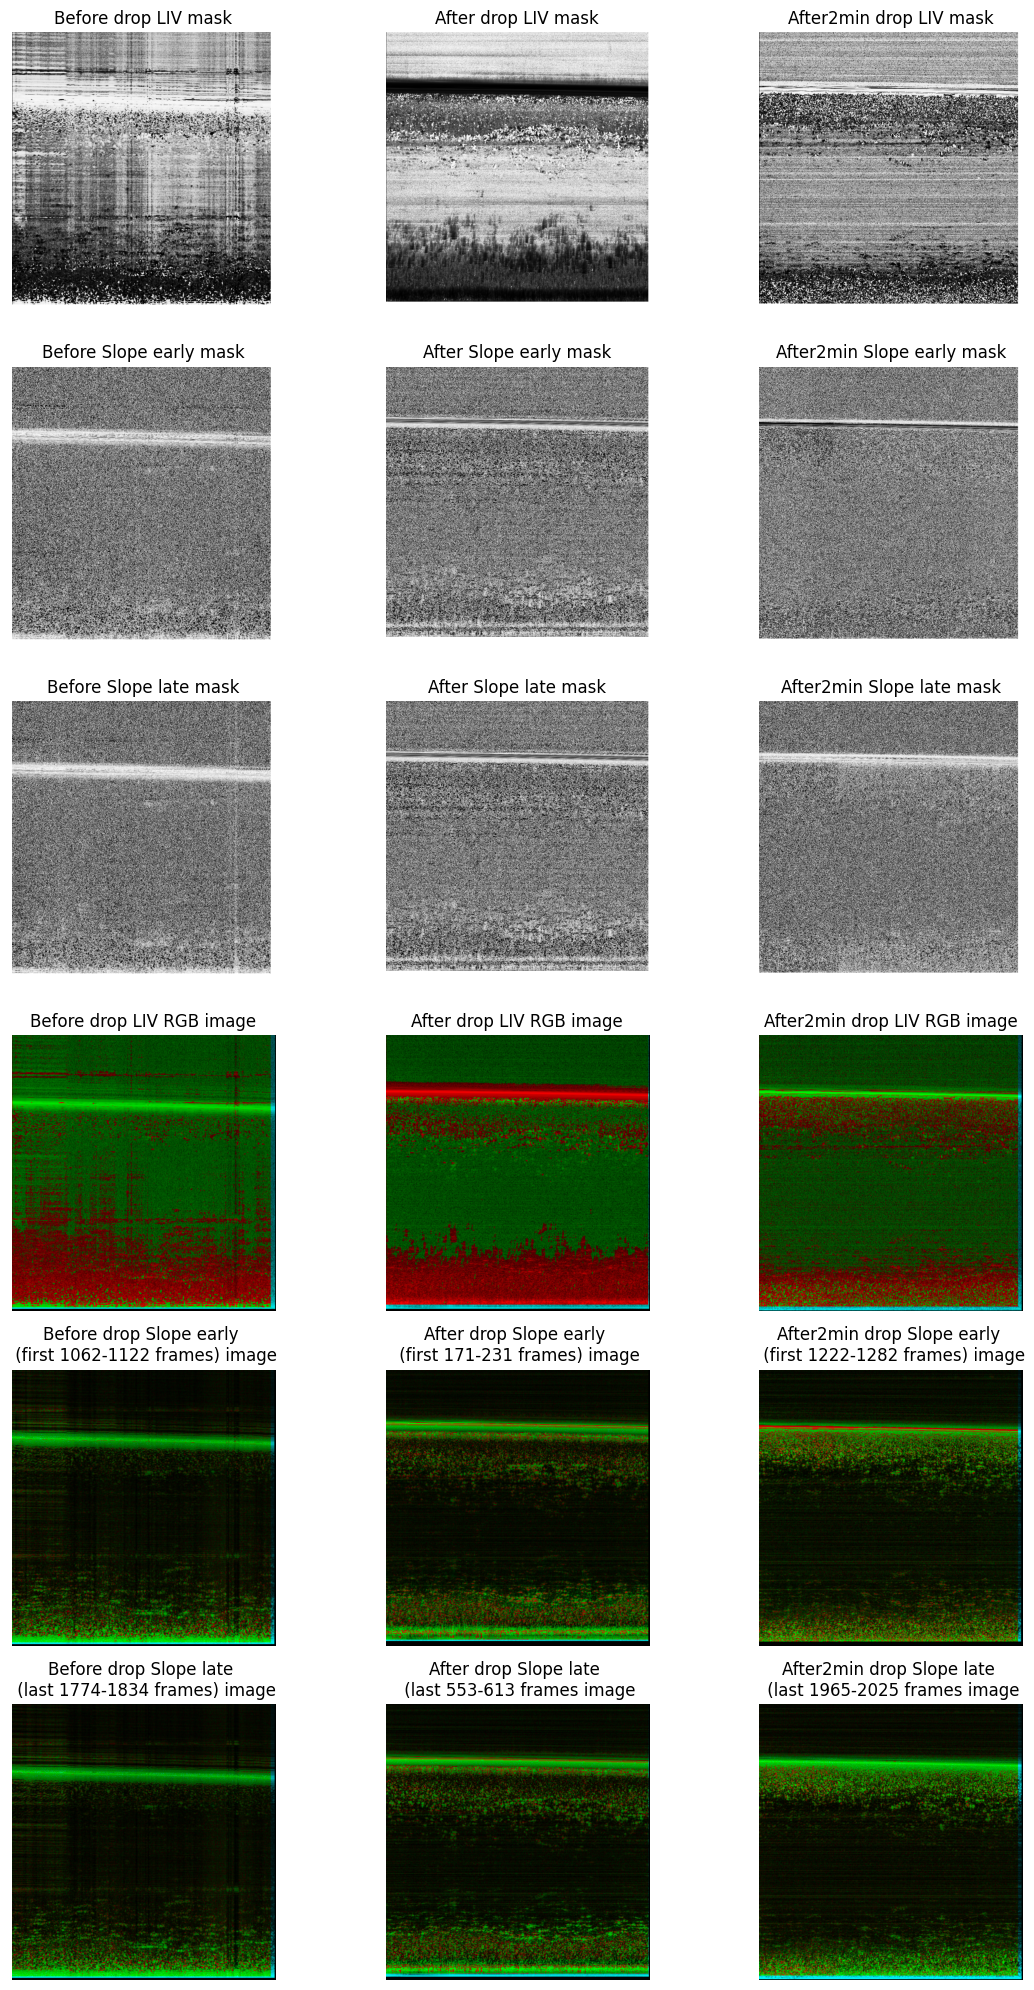

In [ ]:
plt.figure(figsize=(12,20))

# LIV MASKS
plt.subplot(6,3,1)
plt.imshow(liv_masks[0],cmap='gray')
plt.title('Before drop LIV mask')
plt.axis('off')

plt.subplot(6,3,2)
plt.imshow(liv_masks[1],cmap='gray')
plt.title('After drop LIV mask')
plt.axis('off')

plt.subplot(6,3,3)
plt.imshow(liv_masks[2],cmap='gray')
plt.title('After2min drop LIV mask')
plt.axis('off')

# Slope early MASKS
plt.subplot(6,3,4)
plt.imshow(((mask[0,0])),cmap='gray')
plt.title('Before Slope early mask')
plt.axis('off')

plt.subplot(6,3,5)
plt.imshow(((mask[1,0])),cmap='gray')
plt.title('After Slope early mask')
plt.axis('off')

plt.subplot(6,3,6)
plt.imshow(((mask[2,0])),cmap='gray')
plt.title('After2min Slope early mask')
plt.axis('off')

# Slope late MASKS
plt.subplot(6,3,7)
plt.imshow(((mask[0,1])),cmap='gray')
plt.title('Before Slope late mask')
plt.axis('off')

plt.subplot(6,3,8)
plt.imshow(((mask[1,1])),cmap='gray')
plt.title('After Slope late mask')
plt.axis('off')

plt.subplot(6,3,9)
plt.imshow(((mask[2,1])),cmap='gray')
plt.title('After2min Slope late mask')
plt.axis('off')

# RGB LIV
plt.subplot(6,3,10)
plt.imshow(get_rgb(liv_masks[0],np.log10(random_data(0)+1)).astype(np.uint16))
plt.title('Before drop LIV RGB image')
plt.axis('off')

plt.subplot(6,3,11)
plt.imshow(get_rgb(liv_masks[1],np.log10(random_data(1)+1)).astype(np.uint16))
plt.title('After drop LIV RGB image')
plt.axis('off')

plt.subplot(6,3,12)
plt.imshow(get_rgb(liv_masks[2],np.log10(random_data(2)+1)).astype(np.uint16))
plt.title('After2min drop LIV RGB image')
plt.axis('off')

# RGB Slope EARLY
plt.subplot(6,3,13)
plt.imshow(get_rgb(((mask[0,0])),gen_mean_img(0,before_r1)).astype(np.uint16))
plt.title(f'Before drop Slope early \n (first {before_r1-30}-{before_r1+30} frames) image')
plt.axis('off')

plt.subplot(6,3,14)
plt.imshow(get_rgb(((mask[1,0])),gen_mean_img(1,after_r1)).astype(np.uint16))
plt.title(f'After drop Slope early \n (first {after_r1-30}-{after_r1+30} frames) image')
plt.axis('off')

plt.subplot(6,3,15)
plt.imshow(get_rgb(((mask[2,0])),gen_mean_img(2,after2min_r1)).astype(np.uint16))
plt.title(f'After2min drop Slope early \n (first {after2min_r1-30}-{after2min_r1+30} frames) image')
plt.axis('off')

# RGB Slope LATE
plt.subplot(6,3,16)
plt.imshow(get_rgb(((mask[0,1])),gen_mean_img(0,before_r2)).astype(np.uint16))
plt.title(f'Before drop Slope late \n (last {before_r2-30}-{before_r2+30} frames) image')
plt.axis('off')

plt.subplot(6,3,17)
plt.imshow(get_rgb(((mask[1,1])),gen_mean_img(1,after_r2)).astype(np.uint16))
plt.title(f'After drop Slope late \n (last {after_r2-30}-{after_r2+30} frames image')
plt.axis('off')

plt.subplot(6,3,18)
plt.imshow(get_rgb(((mask[2,1])),gen_mean_img(2,after2min_r2)).astype(np.uint16))
plt.title(f'After2min drop Slope late \n (last {after2min_r2-30}-{after2min_r2+30} frames image')
plt.axis('off')

plt.tight_layout()
# plt.savefig('All masks.png',dpi=300)
plt.show()


## 10 batch new

In [9]:
def slope_mask_10batch(arr,p1):
    mask1 = np.zeros_like(arr[0],dtype=np.float32)
    arr = arr[p1-5:p1+5,:,:].astype(np.float32).copy()
    for x in range(arr.shape[1]):
        for y in range(arr.shape[2]):
            data1 = arr[:,x,y].astype(np.float32).copy()
            if np.all(data1 == data1[0]):
                slope1 = 0
            else:
                data1 = (data1-np.min(data1))/(np.max(data1)-np.min(data1))
                slope1 = np.polyfit(range(len(data1)), data1, 1)[0]
            mask1[x, y] = -np.abs(slope1)
    return mask1

In [4]:
mm = load_data(1)
# mm2 = load_data(1,1550)

cleaning: 100%|██████████| 2500/2500 [00:44<00:00, 56.00it/s]


: 

In [5]:
mm = np.apply_along_axis(func1d=min_max,arr=mm,axis=0)

In [132]:
# for i in tqdm(range(mm.shape[0])):
#     mm[i] = mm[i]/np.max(mm[i])

# for i in tqdm(range(mm2.shape[0])):
#     mm2[i] = mm2[i]/np.max(mm2[i])


100%|██████████| 2500/2500 [01:03<00:00, 39.62it/s]


In [5]:
tp = np.fft.fftn(mm[:,:,:])

In [88]:
pp = mm[:300,20,30]

<StemContainer object of 3 artists>

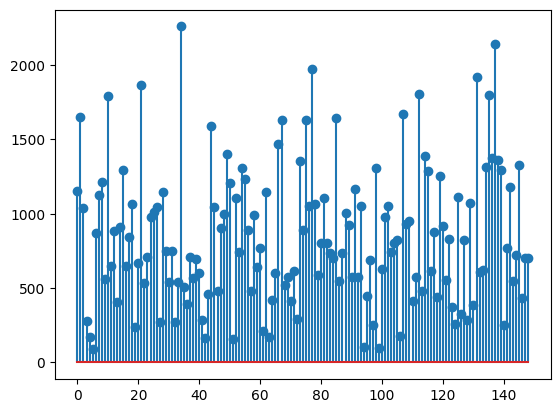

In [103]:
plt.stem(np.abs(tp[:,392,763])[1:150])

<StemContainer object of 3 artists>

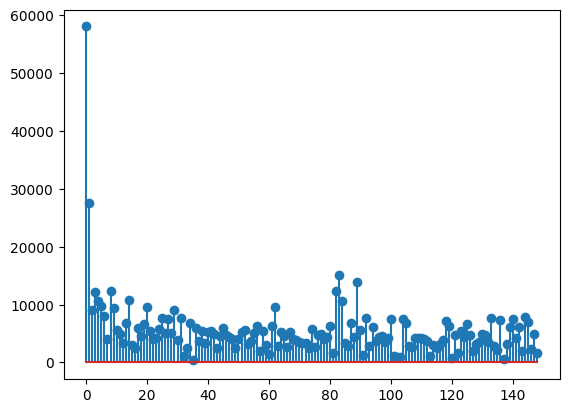

In [95]:
plt.stem(np.abs(tp[:,20,30])[1:150])

<StemContainer object of 3 artists>

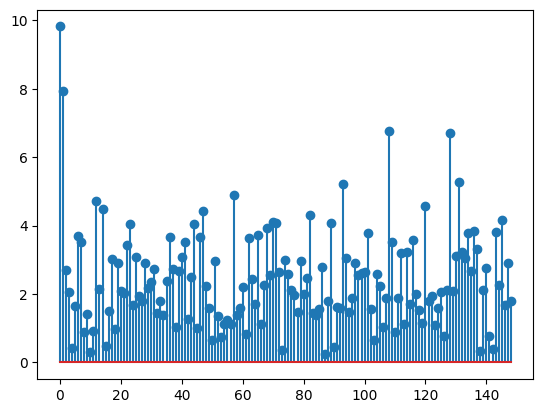

In [106]:
plt.stem(np.abs(np.fft.fft(mm[:300,20,30]))[1:150])

<StemContainer object of 3 artists>

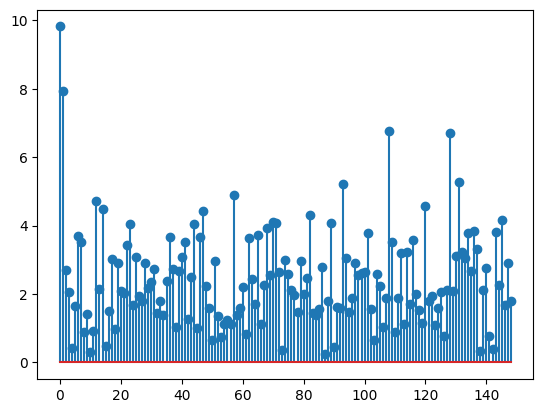

In [ ]:
plt.stem(np.abs(np.fft.fft(mm[:300,20,30]))[1:150])

In [157]:
x = np.abs(np.fft.fft(mm[:300,20,30]))[1:150]

In [158]:
one = np.sum(x[:50])
two = np.sum(x[50:100])
three = np.sum(x[100:])

In [159]:
one, two , three

(130.39930292299243, 112.39028805227916, 123.07919634672179)

In [129]:
def mmx(arr,min_max_range = [1,0]):
    new_arr = (arr - arr.min()) / (arr.max() - arr.min())
    new_arr = new_arr * (min_max_range[0] - min_max_range[1]) + min_max_range[1]
    return new_arr

In [6]:
mean_mm = np.mean(mm,axis=0)
# var_mm = np.var(mm,axis=0)


In [225]:
temp = mean_mm.copy()
temp = np.where(temp>threshold_otsu(temp),0,1)

In [231]:
fft_mm = fft2(mean_mm).flatten().copy()
fft_mm[:100] = 0
ifft_mean = ifft2(fft_mm.reshape(1000,954)).real

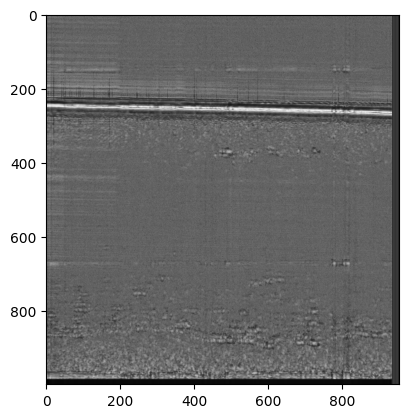

In [232]:
plt.imshow(ifft_mean,cmap='gray')

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(mean_mm.reshape(-1,1))


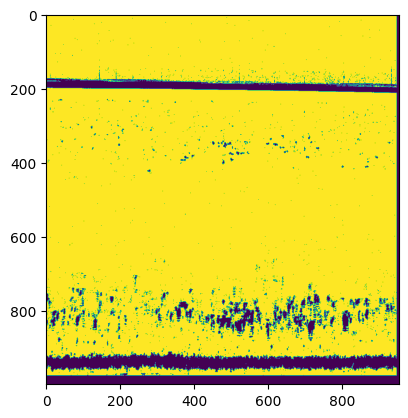

In [20]:
plt.imshow(-kmeans.labels_.reshape(1000,954))

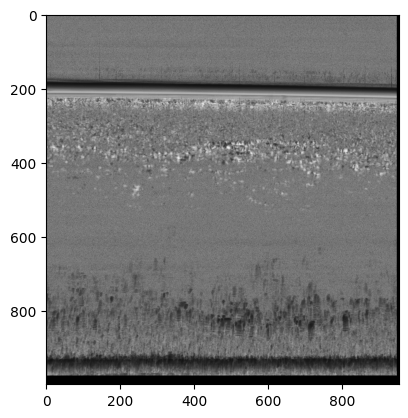

In [7]:
plt.imshow(mean_mm,cmap='gray')

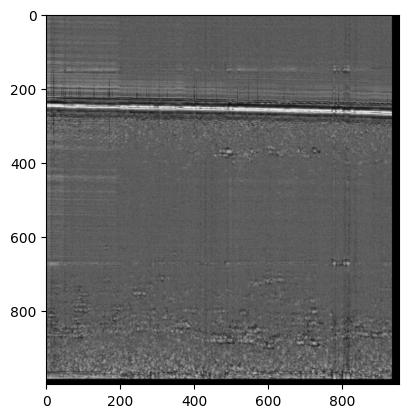

In [224]:
plt.imshow(mean_mm,cmap='gray')

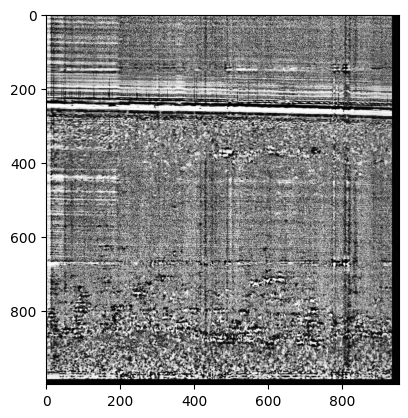

In [199]:
plt.imshow(equalize_adapthist(mean_mm*min_max(-var_mm),nbins=4000),cmap='gray')

In [176]:
a = np.zeros((7,7))
b = np.zeros((7,7))
a[4:6,3:5] = 1
b[2:4,3:5] = 1
v, u = optical_flow_ilk(a, b)

In [9]:
from skimage.registration import optical_flow_tvl1, optical_flow_ilk
from skimage.transform import warp
from sklearn.decomposition import PCA

In [122]:
mm2 = mm[:40].copy()

In [123]:
gg = []
for i in tqdm(range(mm2.shape[0]-1)):
    v, u = optical_flow_ilk(mm2[i], mm2[i+1])
    gg.append(np.array(np.sqrt(v**2 + u**2)))


  0%|          | 0/39 [00:00<?, ?it/s]

100%|██████████| 39/39 [02:36<00:00,  4.02s/it]


In [124]:
np.unique(gg)

array([0.0000000e+00, 1.1419442e-04, 1.4728081e-04, ..., 3.4400592e+02,
       3.5923486e+02, 4.0434784e+02], dtype=float32)

In [125]:
gg = np.array(gg)
gg = np.sum(gg,axis=0)
gg = (gg-np.min(gg))/(np.max(gg)-np.min(gg))

In [117]:
np.unique(gg)

array([0.0000000e+00, 6.3004124e-04, 6.6736812e-04, ..., 9.5844489e-01,
       9.5969671e-01, 1.0000000e+00], dtype=float32)

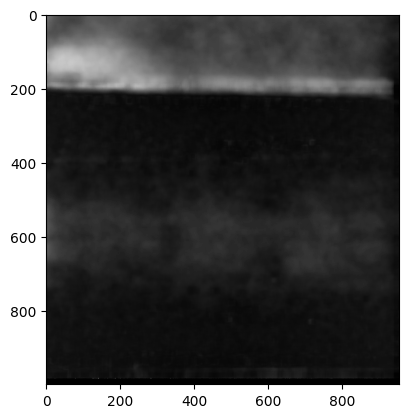

In [126]:
plt.imshow(gg,cmap='gray')

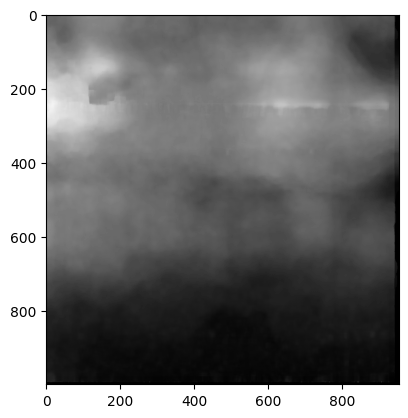

In [119]:
plt.imshow(gg,cmap='gray')

In [79]:
a = v+u

In [80]:
v, u = optical_flow_tvl1(mm2[0], mm2[35])
np.unique(np.array(v+u))

array([-1.6977808, -1.5861176, -1.5463662, ...,  1.1336464,  1.208407 ,
        1.2621531], dtype=float32)

In [81]:
b = v+u

In [86]:
gg = np.stack((a,b))

In [87]:
gg = (gg-np.min(gg))/(np.max(gg)-np.min(gg))

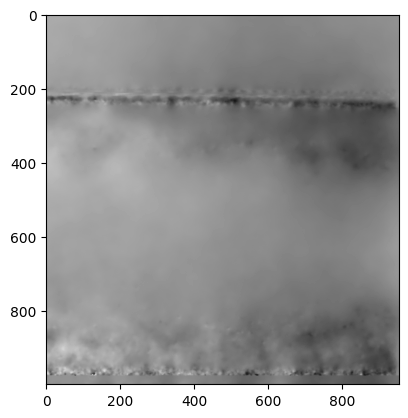

In [76]:
plt.imshow(np.array(v+u),cmap='gray')

In [90]:
np.unique(gg[0])

array([0.        , 0.03875954, 0.07570687, ..., 0.9953506 , 0.9990601 ,
       1.        ], dtype=float32)

In [91]:
np.unique(gg[1])

array([0.2190741 , 0.23588334, 0.24186732, ..., 0.6453032 , 0.6565573 ,
       0.66464794], dtype=float32)

In [95]:
np.correlate(np.abs(fftshift(fft2(mm2[0,:750,:]))).flatten(),np.abs(fftshift(fft2(mm2[10,:750,:]))).flatten())

array([2.8405832e+09], dtype=float32)

In [98]:
np.correlate(np.abs(fftshift(fft2(mm2[0,750:,:]))).flatten(),np.abs(fftshift(fft2(mm2[10,750:,:]))).flatten())

array([3.6421792e+08], dtype=float32)

In [145]:
np.correlate(np.abs((fft2(mm2[0]))).flatten(),np.abs((fft2(mm2[10]))).flatten())

array([5.24466667e+09])

In [114]:
import numpy as np
from numpy.fft import fft2, fftshift

# Assuming mm2 is your 3D NumPy array with shape (40, height, width)
height, width = mm.shape[1], mm.shape[2]

# Pad each image with a padding of 5 on all sides
padded_mm2 = np.pad(mm, ((0, 0), (5, 5), (5, 5)), mode='constant', constant_values=0)

# Create an empty mask image with the same dimensions as the original non-padded image
mask_image = np.zeros((height, width))

# Iterate over the image with a 10x10 window
for y in tqdm(range(height)):
    for x in range(width):
        correlations = []
        
        # Extract the 10x10 patch centered at (y, x) for each image
        abs_fft_patch_first = np.abs(fftshift(fft2(padded_mm2[0, y:y+10, x:x+10]))).flatten()
        for i in range(40):
            patch = padded_mm2[i, y:y+10, x:x+10]
            
            # Compute the FFT and shift it
            fft_patch = fftshift(fft2(patch))
            # Compute the absolute values and flatten them
            abs_fft_patch = np.abs(fft_patch).flatten()
            # Compute the correlation with the first image's patch
            corr = np.correlate(abs_fft_patch, abs_fft_patch_first)
            correlations.append(corr[0])
        
        # Compute the standard deviation of the correlations
        mask_image[y, x] = np.std(correlations)

# Print or process the mask image as needed
print(mask_image)


100%|██████████| 1000/1000 [13:49<00:00,  1.21it/s]

[[0.01423501 0.01574546 0.01646431 ... 0.00990012 0.00499805 0.        ]
 [0.01609627 0.0173398  0.01838832 ... 0.01053083 0.00527221 0.        ]
 [0.01677568 0.01775251 0.01956318 ... 0.01097538 0.00572214 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [128]:
mask_image = -mask_image
mask_image = (mask_image-np.min(mask_image))/(np.max(mask_image)-np.min(mask_image))

In [118]:
import numpy as np
from numpy.fft import fft2, fftshift

# Assuming img is your 3D NumPy array with shape (40, height, width)
def corr_fft(img):
    height, width = img.shape[1], img.shape[2]
    padded_img = np.pad(img, ((0, 0), (5, 5), (5, 5)), mode='constant', constant_values=0)
    mask_image2 = np.zeros((height, width))


    for y in tqdm(range(height)):
        for x in range(width):
            correlations = []

            abs_fft_patch_first = np.abs(fftshift(fft2(padded_img[0, y:y+10, x:x+10]))).flatten()
            for i in range(40):
                patch = padded_img[i, y:y+10, x:x+10]
                fft_patch = fftshift(fft2(patch))
                abs_fft_patch = np.abs(fft_patch).flatten()

                corr = np.correlate(abs_fft_patch, abs_fft_patch_first)
                correlations.append(corr[0])

            mask_image2[y, x] = np.std(correlations)
    mask_image2 = -mask_image2
    mask_image2 = mask_image2-np.min(mask_image2)
    return (mask_image2)


100%|██████████| 1000/1000 [13:54<00:00,  1.20it/s]

[[0.03060406 0.0309597  0.03442086 ... 0.02618205 0.01403959 0.        ]
 [0.03488969 0.03508591 0.04027091 ... 0.02889656 0.01502134 0.        ]
 [0.03848801 0.03980434 0.04582424 ... 0.0298183  0.01521415 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [129]:
mask_image2 = -mask_image2
mask_image2 = (mask_image2-np.min(mask_image2))/(np.max(mask_image2)-np.min(mask_image2))

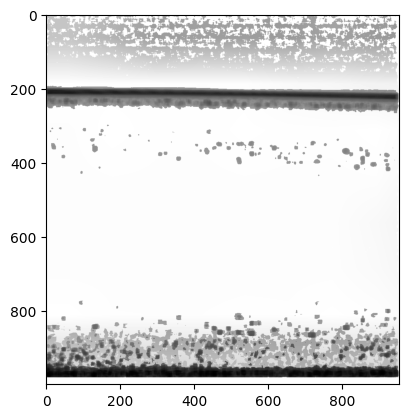

In [143]:
plt.imshow(equalize_adapthist(mask_image2,clip_limit=0.4),cmap='gray')

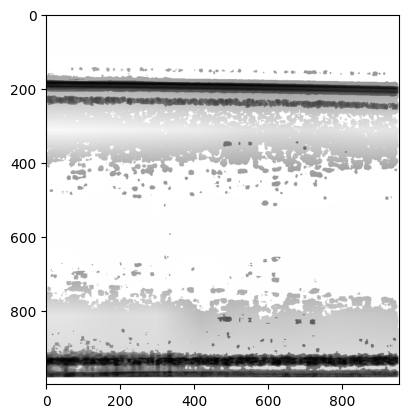

In [142]:
plt.imshow(equalize_adapthist(mask_image,clip_limit=0.4),cmap='gray')

In [89]:
ll = []
for i in range(40-1):
    ll.append(np.correlate(np.abs(fftshift(fft2(mm2[0,365:375,521:531]))).flatten(),np.abs(fftshift(fft2(mm2[i,365:375,521:531]))).flatten()))

In [90]:
np.var(ll)

0.13213941

In [88]:
np.var(ll)

0.1164993

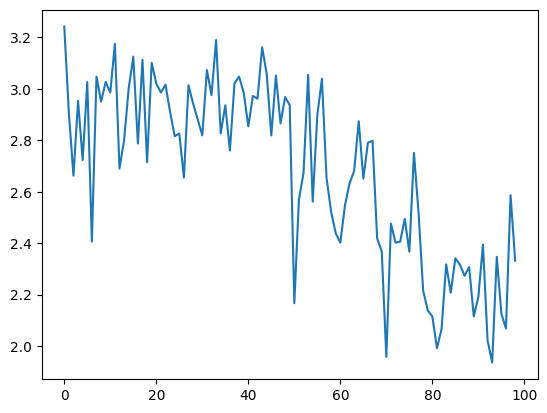

In [75]:
plt.plot(ll)

In [11]:
# mm = (mm-np.min(mm))/(np.max(mm)-np.min(mm))

In [14]:
mm = np.apply_along_axis(axis=0,func1d=min_max,arr=mm)

In [64]:
gg = scp.gaussian_filter1d(mm[100:300,392,763], sigma=5)
np.polyfit(range(len(gg)),gg,1)[0]

0.0001071293507438263

In [65]:
gg = scp.gaussian_filter1d(mm[100:300,392,492], sigma=5)
np.polyfit(range(len(gg)),gg,1)[0]

2.8384067932280594e-05

In [55]:
np.std(mm[:500,392,763])

0.013963278

In [53]:
np.std(mm[:500,392,492])

0.006164951

In [107]:
# gg = mm[100:300].copy()
gg = mm.transpose(1,2,0).reshape(-1,2500)

In [108]:
pca = PCA(0.99)

In [109]:
new_gg = pca.fit_transform(gg)

In [324]:
# test1 = equalize_adapthist(mm[5],nbins=4000)
test1 = mm[5].copy()
fft_vals = fft2(test1)
xx,yy = fft_vals.shape
fft_vals = fft_vals.ravel()

fft_vals[-900000:] = 0
fft_vals = fft_vals.reshape(xx,yy)

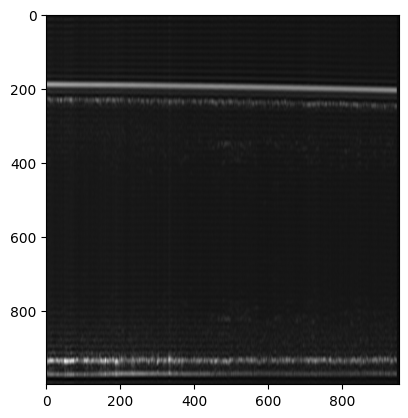

In [325]:
plt.imshow(ifft2(fft_vals).real,cmap='gray')

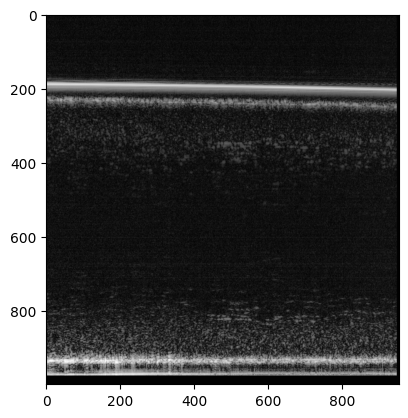

In [282]:
plt.imshow(equalize_adapthist(mm[5],nbins=4000),cmap='gray')

In [99]:
fft_m = fft(mm[:,392,763])
fft_m[50:] = 0
gg = ifft(fft_m)

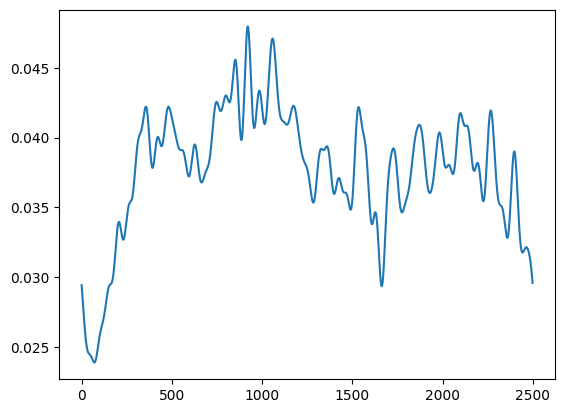

In [100]:
plt.plot(gg.real)

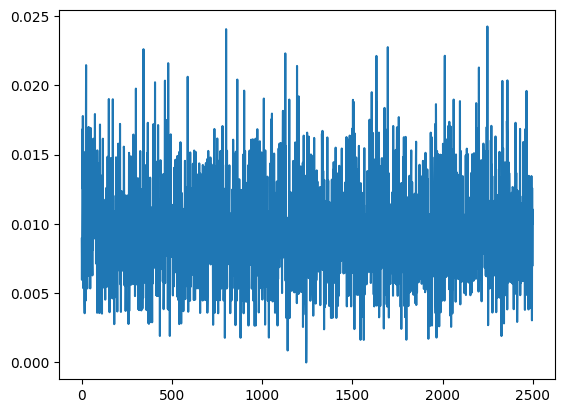

In [105]:
plt.plot(mm[:,392,763])

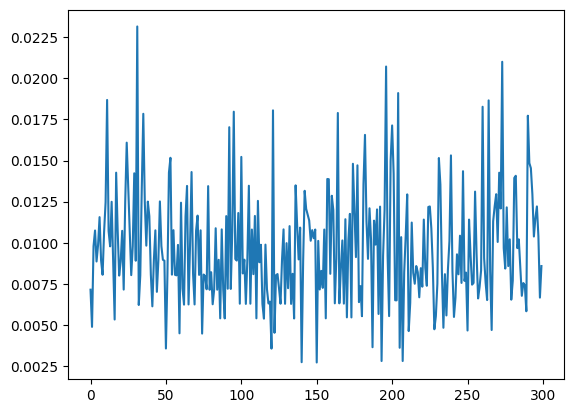

In [106]:
plt.plot(mm[:300,372,763])

In [50]:
np.abs(fft(mm[:300,392,763]))[:150].sum()/np.abs(fft(mm[:300,392,763]))[150:].sum()

1.3924261

In [51]:
np.abs(fft(mm[500:800,392,763]))[:150].sum()/np.abs(fft(mm[500:800,392,763]))[150:].sum()

1.6972536

In [33]:
np.polyfit(range(300),np.abs(fft(mm[:300,392,763])),1)[0]

-0.000417685617725334

In [34]:
np.polyfit(range(300),np.abs(fft(mm[1500:1800,392,763])),1)[0]

-0.0006903660789638424

<StemContainer object of 3 artists>

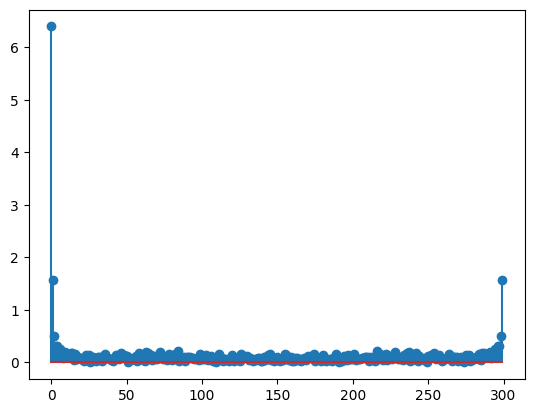

In [344]:
plt.stem(np.abs(fft(mm[:300,392,763])))

In [243]:
fft_vals = fft2(mm[2000,392-10:392+10,763-10:763+10])
xx,yy = fft_vals.shape
fft_vals = fft_vals.ravel()
fft_vals[:100] = 0
fft_vals = fft_vals.reshape(xx,yy)

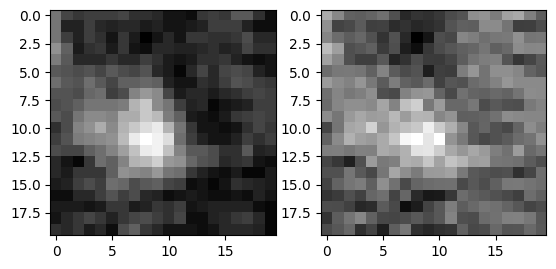

In [246]:
plt.subplot(1,2,1)
plt.imshow(mm[2000,392-10:392+10,763-10:763+10],cmap='gray')

plt.subplot(1,2,2)
plt.imshow(ifft2(fft_vals).real,cmap='gray')

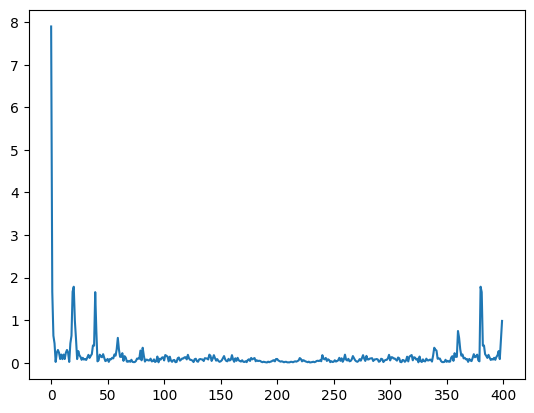

In [229]:
plt.plot(np.abs(fft_vals).ravel())

In [94]:
X = mm[:,392,763]
# freq  = fft(X)
X_filtered = X.copy()
X_filtered[np.abs(fft(X)) > 5] = 0
x_fourier = np.real(ifft(X_filtered))

In [ ]:
mm = np.zeros((2500,100,90))

In [ ]:
len(range(10,2499-10,3))


827

In [ ]:
mask = (mask-np.min(mask))/(np.max(mask)-np.min(mask))

In [2]:
with open('pig_eyeball/registered/masks/60chunk_slope_kmeans/final_before_mask.pickle', 'rb') as handle:
    before_mask = pickle.load(handle)

with open('pig_eyeball/registered/masks/60chunk_slope_kmeans/final_after_mask.pickle', 'rb') as handle:
    after_mask = pickle.load(handle)

with open('pig_eyeball/registered/masks/60chunk_slope_kmeans/final_after_2min_mask.pickle', 'rb') as handle:
    after2min_mask = pickle.load(handle)

In [4]:
# with open('/Users/akapatil/Documents/OCT/pickles/pigeye/after_100chunk_NOT_latest/all_final.pickle', 'rb') as handle:
#     mask = pickle.load(handle)

In [3]:
mask = np.stack((before_mask,after_mask, after2min_mask))
# mask = after_mask.copy()

In [4]:
del before_mask
del after_mask
del after2min_mask

In [5]:
mask = mask[:,:,70:-70,70:-70]

In [6]:
mask.reshape(-1,1).shape

(2562146400, 1)

In [8]:
# mask[0] = (mask[0]-np.min(mask[0]))/(np.max(mask[0])-np.min(mask[0]))
# mask[1] = (mask[1]-np.min(mask[1]))/(np.max(mask[1])-np.min(mask[1]))
# mask[2] = (mask[2]-np.min(mask[2]))/(np.max(mask[2])-np.min(mask[2]))

In [10]:
mask.ravel().shape

In [9]:
mask = (mask-np.min(mask))/(np.max(mask)-np.min(mask))

In [10]:
np.unique(mask[0])

array([0.        , 0.04109954, 0.04554859, ..., 0.9999957 , 0.9999958 ,
       1.        ], dtype=float32)

In [13]:
np.histogram(mask[0])

(array([       22,        83,       357,      1392,      4568,     11916,
            34350,    155741,   1664819, 859175952]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32))

In [11]:
np.unique(mask[1])

array([0.0023688 , 0.00326566, 0.00335867, ..., 0.99999565, 0.9999957 ,
       1.        ], dtype=float32)

In [14]:
np.histogram(mask[1])

(array([      142,       668,      4326,     17322,     25834,     40703,
           130154,    373992,   1692948, 858763111]),
 array([0.0023688 , 0.10213192, 0.20189504, 0.30165815, 0.40142128,
        0.5011844 , 0.6009475 , 0.70071065, 0.80047375, 0.9002369 ,
        1.        ], dtype=float32))

In [12]:
np.unique(mask[2])

array([0.53845835, 0.5456175 , 0.5548148 , ..., 0.99999636, 0.9999964 ,
       1.        ], dtype=float32)

In [6]:
# g = equalize_adapthist(mask[0],clip_limit=0.35)

In [8]:
g = mask[1][1100].copy()

In [16]:
gmin = np.min(g)
gmax = np.max(g)

In [17]:
gmin

0.78234655

(array([3.78000e+02, 4.14000e+02, 3.03000e+02, 6.26000e+02, 1.77800e+03,
        1.39500e+03, 1.34000e+03, 3.22100e+03, 6.70600e+03, 6.83879e+05]),
 array([0.06638303, 0.15974472, 0.25310642, 0.34646812, 0.43982983,
        0.5331915 , 0.62655324, 0.71991491, 0.81327659, 0.90663832,
        1.        ]),
 <BarContainer object of 10 artists>)

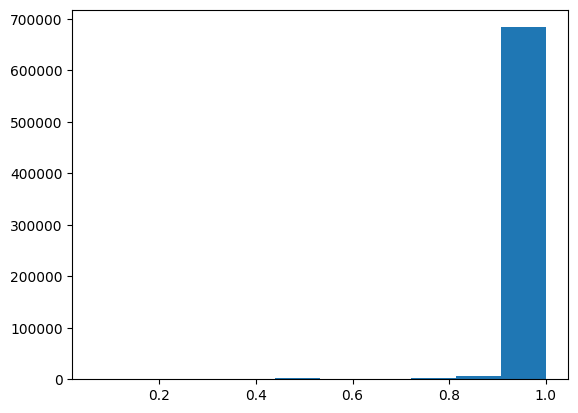

In [45]:
plt.hist(g.flatten())

In [46]:
newg = equalize_adapthist(g,clip_limit=0.35)*(gmax-gmin)+gmin

(array([ 10807.,  20642.,  27913.,  29683.,  33724.,  43816.,  40250.,
         21338., 127916., 343951.]),
 array([0.06638303, 0.15974472, 0.25310642, 0.34646812, 0.43982983,
        0.5331915 , 0.62655324, 0.71991491, 0.81327659, 0.90663832,
        1.        ]),
 <BarContainer object of 10 artists>)

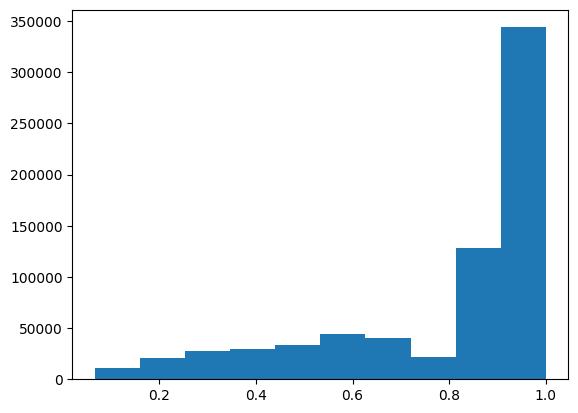

In [47]:
plt.hist(newg.flatten())

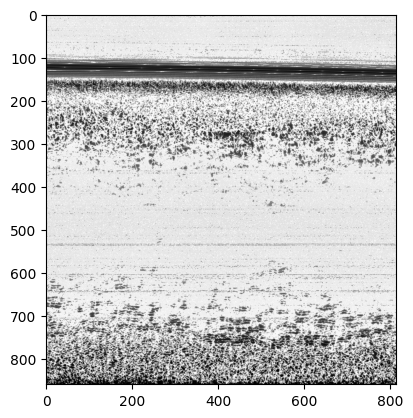

In [48]:
plt.imshow(newg,cmap='gray')

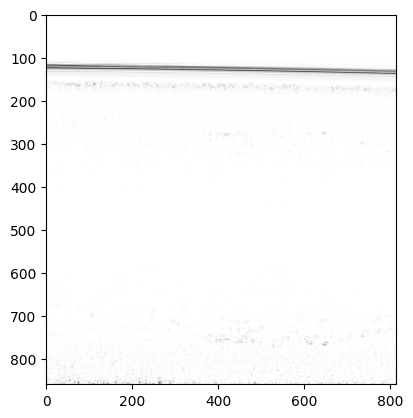

In [36]:
plt.imshow(mask[1][10],cmap='gray')

In [94]:
(mask[1][10]*180).shape

(860, 814)

In [34]:
g = np.array([1,1,1]).reshape(1,1,3).astype(np.float32)
g.shape

(1, 1, 3)

In [36]:
np.where(cv2.cvtColor(g,cv2.COLOR_HSV2RGB)==1,1,0)

array([[[1, 0, 0]]])

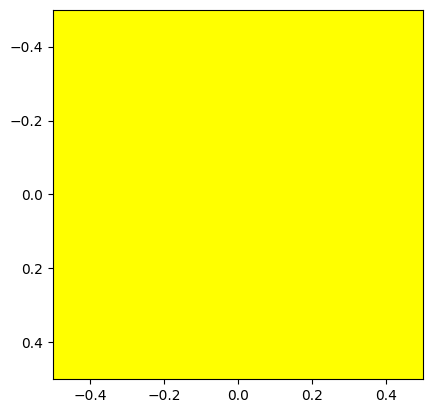

In [31]:
plt.imshow(cv2.cvtColor(g,cv2.COLOR_HSV2RGB))

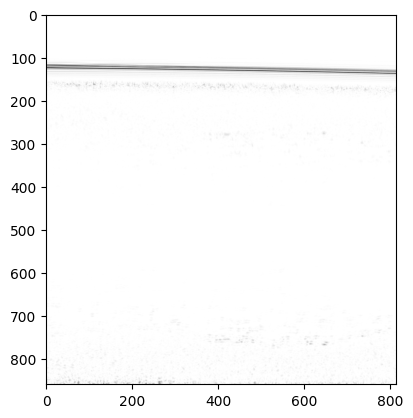

In [50]:
plt.imshow(np.log10(mask[1][10]+1),cmap='gray')

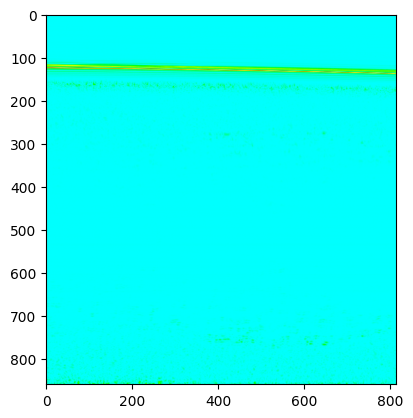

In [49]:
plt.imshow(cv2.cvtColor(np.dstack((mask[1][10]*180,np.full((860, 814),1),np.full((860, 814),1))).astype(np.float32), cv2.COLOR_HSV2RGB))

In [13]:
# del before_mask
# del after_mask
# del after2min_mask

In [37]:
mask.shape

(3, 1200, 860, 814)

In [6]:
# mask = mask[:,70:-70,70:-70]

In [95]:
# mask = cv2.equalizeHist((mask*255).astype(np.uint8).reshape(3,-1))

In [14]:
# mask = (mask-np.min(mask))/(np.max(mask)-np.min(mask))

(array([1.36963000e+05, 3.97090200e+06, 2.04857160e+07, 4.57401530e+07,
        3.78620940e+07, 1.14339960e+08, 5.02642690e+07, 0.00000000e+00,
        2.24984724e+08, 1.24922322e+09]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

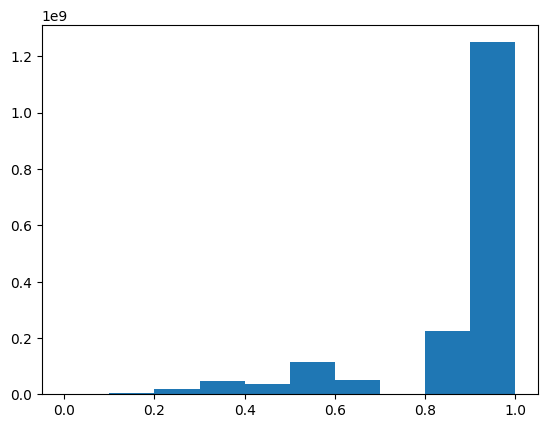

In [19]:
plt.hist(mask.flatten())

In [97]:
# np.histogram(mask)

In [98]:
# clahe = cv2.createCLAHE(clipLimit=0.35*255)
# mask = clahe.apply(((mask*255).astype(np.uint8)).reshape(1200,-1))/255

In [104]:
# mask = mask.reshape(1200,1000-140,954-140)

In [8]:
# mask = equalize_adapthist(mask,clip_limit=0.35,nbins=256)

In [16]:
np.unique(mask[2])

array([0.0000000e+00, 6.1038882e-05, 1.2207776e-04, ..., 9.9987793e-01,
       9.9993896e-01, 1.0000000e+00], dtype=float32)

(array([3.27824300e+06, 1.42714760e+07, 2.11882730e+07, 2.62559530e+07,
        2.11821580e+07, 4.52711940e+07, 3.33158360e+07, 1.30382900e+06,
        3.69594904e+08, 3.04386134e+08]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

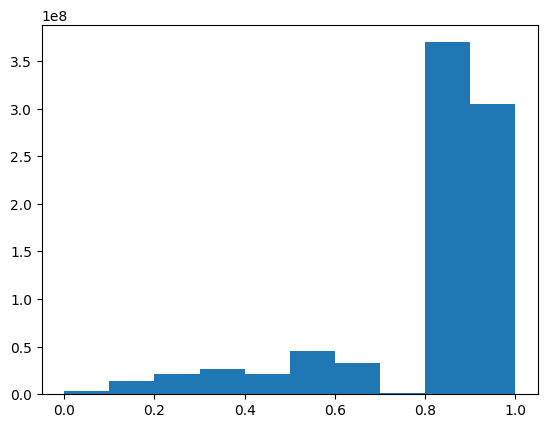

In [12]:
plt.hist((mask[1]).flatten())

(array([ 27379.,  33277.,  32984.,  32621.,  33586.,  36308.,  41159.,
         45053.,  24586., 393087.]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

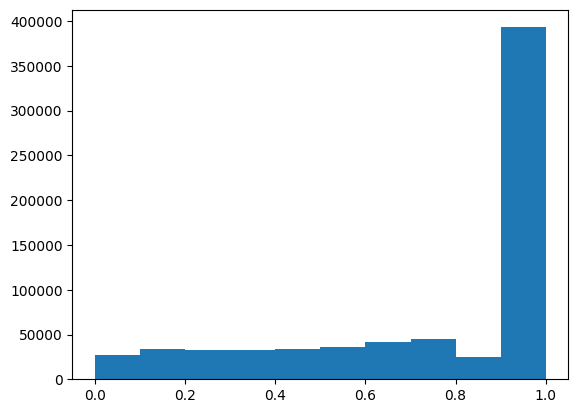

In [18]:
plt.hist(equalize_adapthist(mask[100],clip_limit=0.15).flatten())

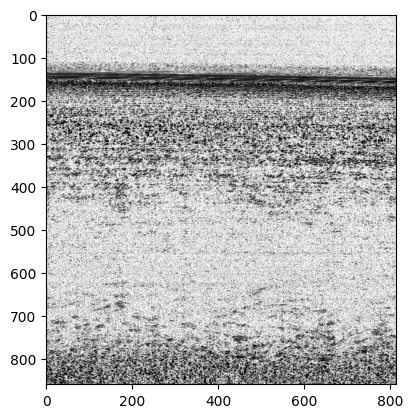

In [135]:
plt.imshow(equalize_adapthist(mask[1100],clip_limit=0.2),cmap='gray')

In [55]:
# for i in tqdm(range(mask.shape[0])):
#     mask[i] = equalize_adapthist(mask[i],clip_limit=0.2)

100%|██████████| 1200/1200 [00:53<00:00, 22.46it/s]


In [37]:
# mask = equalize_hist(mask)
# mask[1] = equalize_hist(mask[1])
# mask[2] = equalize_hist(mask[2])

In [23]:
# mask = (mask-np.min(mask))/(np.max(mask)-np.min(mask))
# for i in range(mask.shape[0]):
#     for j in range(mask.shape[1]):
#         mask[i,j] = equalize_hist(mask[i,j])
mask = (mask-np.min(mask))/(np.max(mask)-np.min(mask))

In [39]:
# os.mkdir('pig_eyeball/registered/masks/new_827/')
# os.mkdir('pig_eyeball/registered/masks/new_827/before/')
# os.mkdir('pig_eyeball/registered/masks/new_827/after/')
# os.mkdir('pig_eyeball/registered/masks/new_827/after2min/')

In [ ]:
# for i,j in tqdm(enumerate(mask[0])):
#     cv2.imwrite('pig_eyeball/registered/masks/new_827/before/'+f'maks{i}.tiff',(j*255).astype(np.uint8))

# for i,j in tqdm(enumerate(mask)):
#     cv2.imwrite('pig_eyeball/registered/masks/new_1250/after/'+f'maks{i}.tiff',(j*255).astype(np.uint8))

# for i,j in tqdm(enumerate(mask[2])):
#     cv2.imwrite('pig_eyeball/registered/masks/new_827/after2min/'+f'maks{i}.tiff',(j*255).astype(np.uint8))

1225it [00:42, 29.03it/s]


In [25]:
len(range(50,2500-50,2))

1200

In [39]:
# # # after_data = load_data(1)

# all_after_mean = np.zeros((1230,1000,954))
# j=0
# for i in tqdm(range(20,2500-20,2)):
#     all_after_mean[j] = gen_mean_img(1,i,dis=True)
#     j+=1
    
# # all_after_mean = all_after_mean[:,70:-70,70:-70]
# with open('/Users/akapatil/Documents/OCT/pickles/40_temp_all_after.pickle', 'wb') as handle:
#     pickle.dump(all_after_mean, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [10]:
# with open('/Users/akapatil/Documents/OCT/pickles/temp_all_before.pickle', 'rb') as handle:
#     all_after_mean = pickle.load(handle)

with open('/Users/akapatil/Documents/OCT/pickles/40_temp_all_after2min.pickle', 'rb') as handle:
    all_after_mean = pickle.load(handle)


In [11]:
mask.shape

(3, 1230, 860, 814)

In [12]:
all_after_mean = all_after_mean[:,70:-70,70:-70]
all_after_mean.shape

(1230, 860, 814)

In [13]:
n = 2
for mk_idx in tqdm(range(mask[n].shape[0])):
    mkmin = np.min(mask[n][mk_idx])
    mkmax = np.max(mask[n][mk_idx])
    mask[n][mk_idx] = equalize_adapthist(mask[n][mk_idx],clip_limit=0.4)*(mkmax-mkmin)+mkmin

python(85280) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
100%|██████████| 1230/1230 [00:57<00:00, 21.47it/s]


In [14]:
def get_rgb(mask,img,percent = 99.9):
    # temp_mask[temp_mask>np.percentile(temp_mask,percent)]=0
    # temp_mask = temp_mask/np.max(temp_mask)
    h = (mask*90).astype(np.float32)
    # h[h<70] = np.min(h)
    s = np.full_like(mask,1).astype(np.float32)
    v = (((img - np.min(img)) / (np.max(img) - np.min(img)))*1).astype(np.float32)
    # v = (img/np.max(img))*255
    hsv_img = np.dstack((h,s,v))
    rgb_image = cv2.cvtColor(hsv_img.astype(np.float32), cv2.COLOR_HSV2RGB)
    rgb_image[rgb_image<0] = 0
    return rgb_image

In [15]:
all_rgb = np.zeros((1230,all_after_mean.shape[1],all_after_mean.shape[2],3),dtype=np.float32)

for i in tqdm(range(1230)):
    all_rgb[i] = get_rgb(mask[n][i],all_after_mean[i]).astype(np.float32)

100%|██████████| 1230/1230 [01:06<00:00, 18.58it/s]


In [16]:
# os.mkdir('/Users/akapatil/Documents/OCT/pig_eyeball/registered/masks/after_100chunk_NOT_latest/')
# os.mkdir('/Users/akapatil/Documents/OCT/pig_eyeball/registered/masks/after_100chunk_NOT_latest/rgb/')
# os.mkdir('/Users/akapatil/Documents/OCT/pig_eyeball/registered/masks/40chunk_new/before/')
for i,j in tqdm(enumerate(all_rgb)):
    cv2.imwrite('/Users/akapatil/Documents/OCT/pig_eyeball/registered/masks/40chunk_new/after2min/'+f'maks{i}.PNG',cv2.cvtColor(j, cv2.COLOR_RGB2BGR)*255)


1230it [00:42, 28.95it/s]


: 

In [32]:
def min_max(data1):
    if np.all(data1 == data1[0]):
        return data1
    else:
        data1 = (data1-np.min(data1))/(np.max(data1)-np.min(data1))
        return data1

def slope_mask_10batch(arr,p1):
    mask1 = np.zeros_like(arr[0],dtype=np.float32)
    arr = arr[p1-50:p1+50,:,:].astype(np.float32)
    std_mask = np.apply_along_axis(func1d=np.std,arr=arr,axis=0)
    arr = np.apply_along_axis(func1d=min_max,arr=arr,axis=0)
    for x in range(arr.shape[1]):
        for y in range(arr.shape[2]):
            data1 = arr[:,x,y].astype(np.float32).copy()
            slope1 = np.polyfit(range(len(data1)), data1, 1)[0]
            mask1[x, y] = -np.abs(slope1)
    return mask1*std_mask

In [ ]:
mask.shape

(3, 25, 1000, 954)

In [ ]:
def slope_batch(data1):
    if np.all(data1 == data1[0]):
        slope1 = 0
    else:
        data1 = (data1-np.min(data1))/(np.max(data1)-np.min(data1))
        slope1 = np.polyfit(range(len(data1)), data1, 1)[0]
    return(-np.abs(slope1))

In [ ]:
mm = []
for _ in range(10):
    mm.append(random_data(1,_+100))

In [ ]:
mm = np.array(mm)

In [ ]:
mm.shape

(10, 1000, 954)

In [ ]:
a = np.ones((10,5,5))

In [ ]:
slope_mask_10batch(mm,5)

array([[-0.02895623, -0.00909091, -0.05021645, ..., -0.04242424,
         0.        ,  0.        ],
       [-0.01212121, -0.01515152, -0.03515152, ..., -0.04242424,
         0.        ,  0.        ],
       [-0.06545454, -0.03333334, -0.02222222, ..., -0.04242424,
         0.        ,  0.        ],
       ...,
       [-0.02101316, -0.02119361, -0.02507122, ..., -0.04421262,
         0.        ,  0.        ],
       [-0.04702912, -0.03938834, -0.03702499, ..., -0.0458241 ,
         0.        ,  0.        ],
       [-0.04242424, -0.04242424, -0.04242424, ..., -0.04242424,
         0.        ,  0.        ]], dtype=float32)

In [ ]:
kk = np.apply_along_axis(slope_batch,axis=0,arr = mm)

# testing2

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:

tester = load_data(1)
# tester = tester[range(0,tester.shape[0],5)]
# pca = PCA(0.99)
kk1 = KMeans(n_clusters=3,n_init='auto',random_state=0)
# pca.fit(tester[range(0,tester.shape[0],5)].reshape(500,-1))
# new = pca.transform(tester.reshape(500,-1))
kk1.fit(tester[range(0,tester.shape[0],5)].reshape(500,-1))
mm = kk1.predict(tester.reshape(2500,-1))
del tester

cleaning: 100%|██████████| 2500/2500 [00:13<00:00, 190.76it/s] 


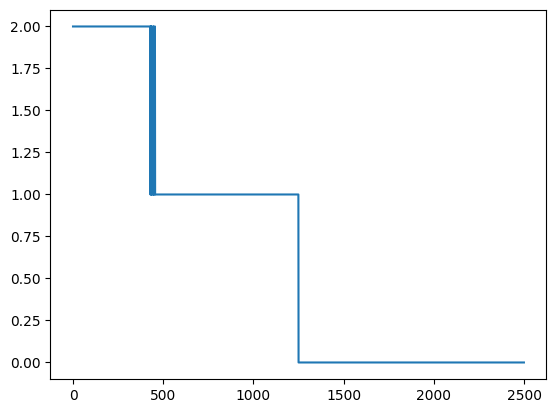

In [ ]:
plt.plot(mm)

In [ ]:
# smoothed_array = moving_average((kk1.labels_), 25)
# smoothed_array = np.where(smoothed_array>1.5,2,np.where(smoothed_array<0.5,0,np.where((0.5<=smoothed_array) & (smoothed_array<=1.5),1,smoothed_array)))
# # p1,p2 = np.sort(find_longest_patch(kk1.labels_))
# np.sort(find_longest_patch(smoothed_array))

In [ ]:
tester = load_data(0)
# tester = tester[range(0,tester.shape[0],5)]
pca = PCA(0.99)
kk1 = KMeans(n_clusters=3,n_init='auto',random_state=0)
pca.fit(tester[range(0,tester.shape[0],5)].reshape(500,-1))
new = pca.transform(tester.reshape(2500,-1))
kk1.fit(np.abs(fft(new)))
del tester

cleaning: 100%|██████████| 2500/2500 [00:21<00:00, 114.91it/s]


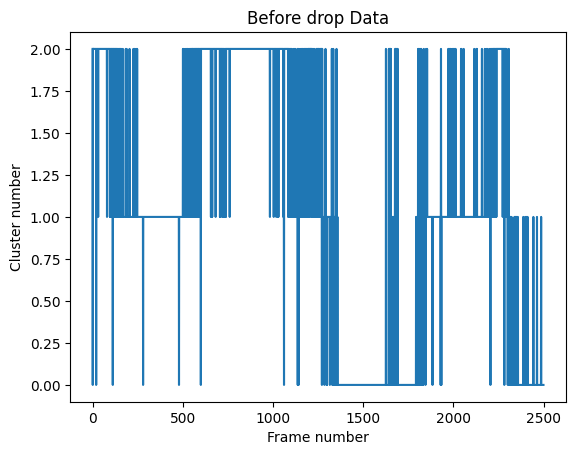

In [ ]:
plt.title('Before drop Data')
plt.plot(kk1.labels_)
plt.xlabel('Frame number')
plt.ylabel('Cluster number')
plt.show()

In [ ]:
tester = load_data(1)
# tester = tester[range(0,tester.shape[0],5)]
pca = PCA(0.99)
kk1 = KMeans(n_clusters=3,n_init='auto',random_state=0)
pca.fit(tester[range(0,tester.shape[0],5)].reshape(500,-1))
new = pca.transform(tester.reshape(2500,-1))
kk1.fit(np.abs(fft(new)))
del tester

cleaning: 100%|██████████| 2500/2500 [00:14<00:00, 167.00it/s]


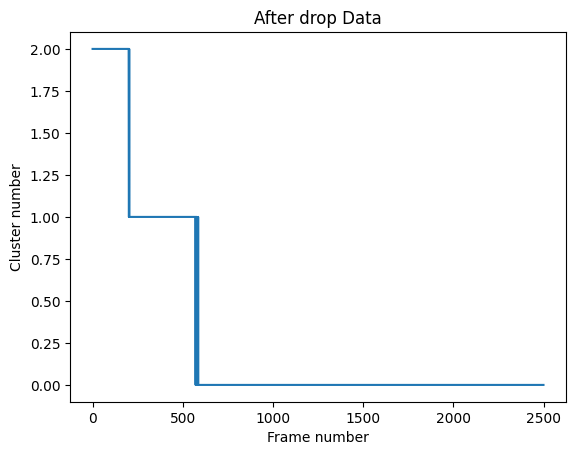

In [ ]:
plt.title('After drop Data')
plt.plot(kk1.labels_)
plt.xlabel('Frame number')
plt.ylabel('Cluster number')
plt.show()

In [ ]:
kk1 = KMeans(n_clusters=3,n_init='auto',random_state=0)
tester2 = load_data(1)
tester2 = tester2[range(0,tester2.shape[0],5)]
kk1.fit(tester2.reshape(500,-1))
del tester2

cleaning: 100%|██████████| 2500/2500 [00:01<00:00, 1515.70it/s]


In [ ]:
from matplotlib.colors import LinearSegmentedColormap
colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]

cmap = LinearSegmentedColormap.from_list("rgb", colors)


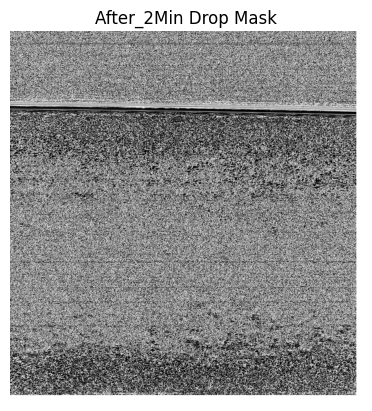

In [ ]:
plt.title('After_2Min Drop Mask')
plt.imshow(cv2.equalizeHist((mask[2,0]*255).astype(np.uint8))/255,cmap='gray')
plt.axis('off')
plt.show()

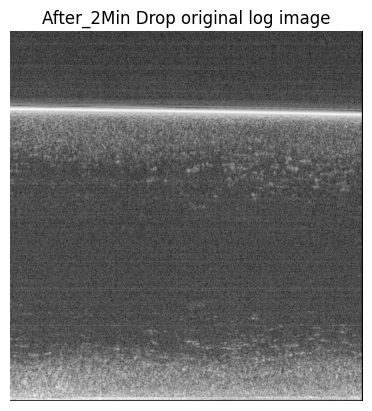

In [ ]:
plt.title('After_2Min Drop original log image')
plt.imshow(np.log10(random_data(2,1240)+1),cmap='gray')
# plt.xlabel('frame number')
# plt.ylabel('Cluster number')
# plt.colorbar()
# plt.clim(1,0)
plt.axis('off')
plt.show()

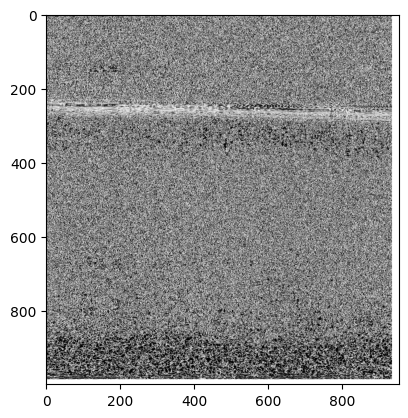

In [ ]:
plt.imshow(equalize_hist(mask[0,0]),cmap='gray')

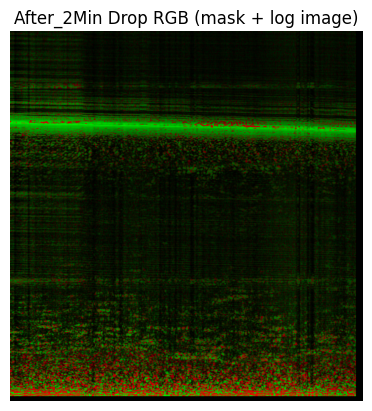

In [ ]:
plt.title('After_2Min Drop RGB (mask + log image)')
plt.imshow(get_rgb(cv2.equalizeHist((mask[0,0]*255).astype(np.uint8))/255,equalize_adapthist(np.mean(mm,axis=0),nbins=4000)).astype(np.uint16))
# plt.xlabel('frame number')
# plt.ylabel('Cluster number')
# plt.colorbar()
# plt.clim(1,0)
plt.axis('off')
plt.show()

In [ ]:
tester2 = load_data(0)
tester2 = tester2[range(785,845)]

cleaning: 100%|██████████| 2500/2500 [00:01<00:00, 1572.21it/s]


In [ ]:
# mm = tester2[:,347,720]
mm = (tester2-np.min(tester2))/(np.max(tester2)-np.min(tester2))
# smoothed_array = moving_average(mm, 25)

In [ ]:
from skimage.exposure import equalize_hist
from skimage.exposure import equalize_adapthist

In [ ]:
plt.imshow(equalize_thist(mask[0,0],clip_limit=0.35),cmap='gray')
plt.title('Average Image of log(60 frames) \n Used to Calculate the Mask')
plt.axis('off')
plt.show()

NameError: name 'equalize_thist' is not defined

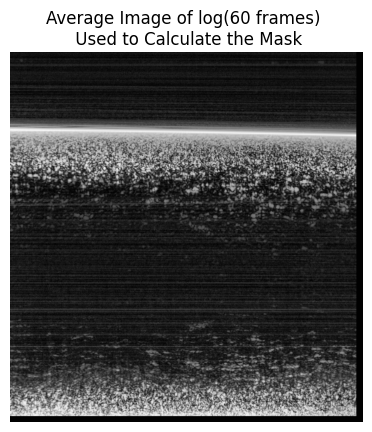

In [ ]:
plt.imshow(equalize_adapthist(np.mean(tt,axis=0),nbins=4000),cmap='gray')
plt.title('Average Image of log(60 frames) \n Used to Calculate the Mask')
plt.axis('off')
plt.show()

In [ ]:
kk1 = KMeans(n_clusters=3,n_init='auto',random_state=0)
tester2 = load_data(0)
tester2 = tester2[range(0,tester2.shape[0],5)]
kk1.fit(tester2.reshape(500,-1))
del tester2

cleaning: 100%|██████████| 2500/2500 [00:01<00:00, 1678.64it/s]


Text(0, 0.5, 'Cluster number')

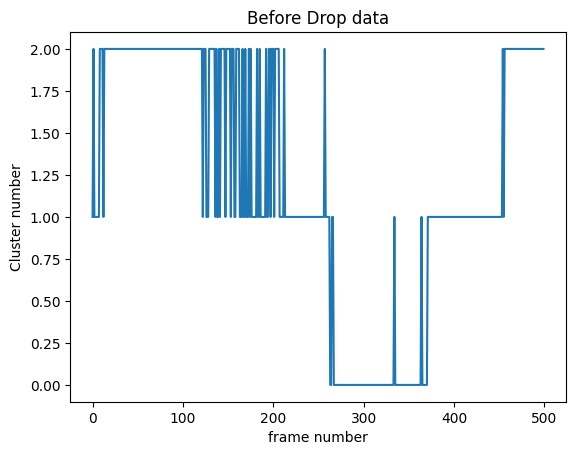

In [ ]:
plt.title('Before Drop data')
plt.plot(kk1.labels_)
plt.xlabel('frame number')
plt.ylabel('Cluster number')

In [ ]:
def moving_average(arr, window_size):
    return np.convolve(arr, np.ones(window_size) / window_size, mode='same')
smoothed_array = moving_average((kk1.labels_), 25)
# lbls = (kk1.labels_).copy()
smoothed_array = np.where(smoothed_array>1.5,2,np.where(smoothed_array<0.5,0,np.where((0.5<=smoothed_array) & (smoothed_array<=1.5),1,smoothed_array)))

In [ ]:
tester = load_data(1)
# tester = tester[range(0,tester.shape[0],5)]
pca = PCA(0.99)
# kk1 = KMeans(n_clusters=3,n_init='auto',random_state=0)
pca.fit(tester[range(0,tester.shape[0],5)].reshape(500,-1))
new = pca.transform(tester.reshape(2500,-1))
# kk1.fit(np.abs(fft(new)))
del tester

cleaning: 100%|██████████| 2500/2500 [00:15<00:00, 159.25it/s]


In [ ]:
new.shape

(2500, 233)

In [ ]:
fft_data = np.abs(fft(new))

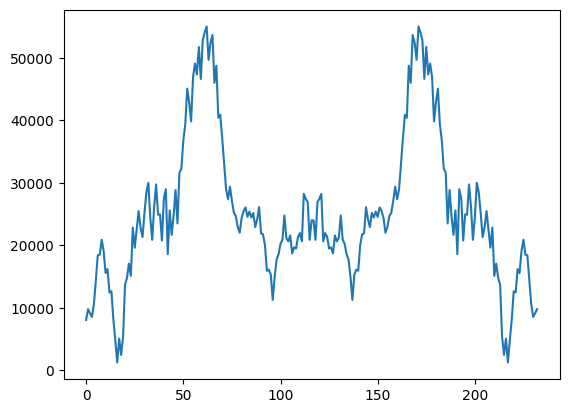

In [ ]:
plt.plot(fft_data[500])

In [ ]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, random_state=0).fit_predict(fft_data)

ValueError: Fitting the mixture model failed because some components have ill-defined empirical covariance (for instance caused by singleton or collapsed samples). Try to decrease the number of components, or increase reg_covar.

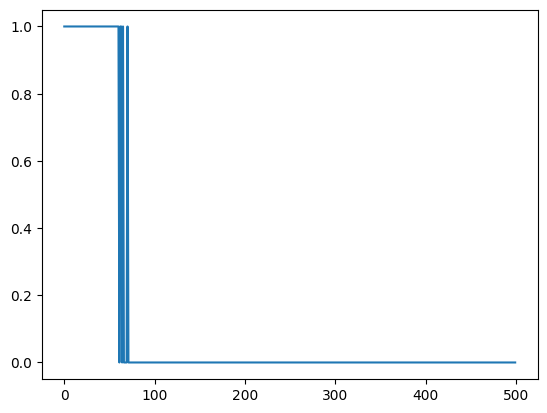

In [ ]:
plt.plot(gm)

In [ ]:
kk1 = KMeans(n_clusters=3,n_init='auto',random_state=0)
# new = pca.fit_transform(tester.reshape(500,-1))
kk1.fit(fft_data.reshape(500,-1))

KMeans(n_clusters=3, n_init='auto', random_state=0)

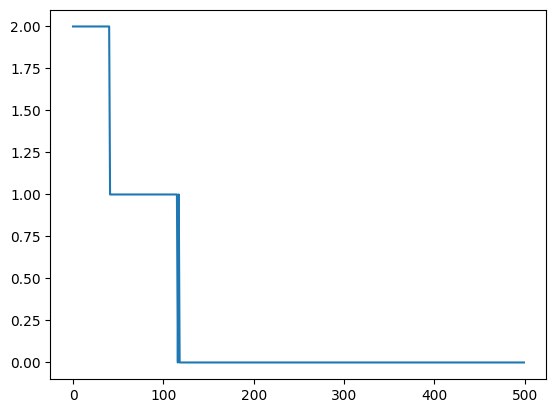

In [ ]:
plt.plot(kk1.labels_)

In [ ]:
# for i,j in tqdm(enumerate(new_data)):
#     cv2.imwrite('/Users/akapatil/Documents/OCT/pig_eyeball/test/'+f'frame_ants{i}.PNG',j.astype(np.uint16))

500it [00:07, 70.56it/s]


In [ ]:
find_longest_patch(smoothed_array)

0 248 249 383


(248, 383)

In [ ]:
lbls = (np.diff(kk1.labels_)+1).copy()
for i in range(5,len(lbls)-5,10):
    lbls[i-5:i+5] = np.max(lbls[i-5:i+5])


In [ ]:
np.where((0.5<=smoothed_array) & (smoothed_array<=1.5),1,smoothed_array)

array([1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.52,
       1.6 , 1.68, 1.72, 1.72, 1.76, 1.8 , 1.84, 1.88, 1.92, 1.96, 1.96,
       1.96, 1.96, 1.96, 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  ,
       2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  ,
       2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  ,
       2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  ,
       2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  ,
       2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  ,
       2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  ,
       2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  ,
       1.96, 1.96, 1.96, 1.96, 1.92, 1.88, 1.84, 1.84, 1.84, 1.84, 1.84,
       1.84, 1.84, 1.84, 1.8 , 1.8 , 1.76, 1.72, 1.72, 1.68, 1.68, 1.68,
       1.68, 1.68, 1.68, 1.68, 1.68, 1.68, 1.68, 1.72, 1.76, 1.76, 1.76,
       1.76, 1.76, 1.72, 1.68, 1.68, 1.68, 1.72, 1.